<div style="background-color: lightblue; padding: 30px;">
    
# Digital House - Data Science a Distancia

## Proyecto Final Integrador

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
    
<p style="text-align:right;">Agosto 2022</p>

---
</div>    

---
## Objetivo del Proyecto Final Integrador

<h4 style="text-align:center;">Demostrar que aprendimos conceptos y desarrollamos habilidades para obtener un modelo de aprendizaje automático que razonablemente predice un valor</h4>

### Escenario

Trabajamos como científicos de datos para una compañía; para consolidar nuestra posición presentamos el prototipo de un producto / servicio que permita transformar organizaciones al modelo Data-Driven Organization

### Requisitos del Proyecto Final Integrador

- Utilizar modelos de **regresión** o **clasificación** (es opcional) 👍
- Evaluar modelos mediante ensemble, bagging o **boosting** 👍
- Realizar **selección de hiperparámetros** 👍
- **Implementar pipeline** al menos con algunos pasos del preprocesamiento 👍
- Analizar **importancia de características** 👍
- **Serializar el modelo** con mejor desempeño 👍

### Entregables del Proyecto Final Integrador
#### Técnico (Jupyter Notebook)

1. Introducción y planteo del problema
2. Técnicas a utilizar y detalle del conjunto de datos
3. Desarrollo del análisis, visualizaciones, resultados de modelos
4. Detalle de hallazgos, conclusiones y recomendaciones

#### Presentación (audiencia NO TÉCNICA)

1. Resumen del problema
2. Métodos utilizados
3. Principales resultados

### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión *4.13.0 build  3.21.6, Python 3.9.7*

Deben asegurarse de tener la última versión de scikit-learn, pueden actualizar a la última versión accediendo a la consola de Anaconda y ejecutando:

    conda upgrade -c conda-forge scikit-learn
    
o accediendo a una terminal del sistema operativo y ejectutar (en esta opción recuerden habiliar el entorno en el que ejecutarán la notebook):

    python -m pip install scikit-learn --upgrade

Es necesario tener instalado el módulo **SHAP**

    conda install -c conda-forge/label/cf202003 shap

También hace falta XGBoost (en el enlace está la información para su instalación):

- [XGBoost](https://xgboost.readthedocs.io/en/stable/install.html)

---

---
<a id="Content"></a>
## Contenido

<div>
<dl style="display:block; margin-top:1em; margin-bottom:1em; margin-left:2em; margin-right:0;">
    <dt><b>1. Introducción y planteo del problema</b></dt>
    <dd><a href="#Indtroduction_1_1">1.1. Introducción</a></dd>
    <dd><a href="#TheProblem_1_2">1.2. El problema</a></dd>
    <dd><br/></dd>
    <dt><b>2. Técnicas a utilizar y detalle del conjunto de datos</b></dt>
    <dd><a href="#TechniquesDescription_1">2.1. Técnicas utilizadas</a></dd>
    <dd><a href="#DatasetDescription_1">2.2. Descripción de los datos</a></dd>
    <dd><br/></dd>
    <dt><b>3. Desarrollo del análisis, visualizaciones, resultados de modelos</b></dt>
    <dd><a href="#ExploratoryDataAnalysis_3_1">3.1. Correlaciones entre datos básicos</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_2">3.2. Correlaciones con palabras frecuentes y días de publicación</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_3">3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones</a></dd>
    <dd><br/></dd>
    <dd><a href="#ProofOfConcept_3_4_1">3.4. Modelos de regresión</a></dd>
    <dd><a href="#ProofOfConcept_3_4_1">3.4.1. Prueba de concepto para modelos de regresión</a></dd>
    <dd><a href="#GridSearch_Evaluate_3_4_2">3.4.2. Evaluación de hiper parámetros para XGBRegressor</a></dd>
    <dd><a href="#Evaluate_Regression_Model_3_4_3">3.4.3. Evaluación del modelo de regresión</a></dd>
    <dd><br/></dd>
    <dd><a href="#ProofOfConcept_3_5_1">3.5. Modelos de clasificación</a></dd>
    <dd><a href="#ProofOfConcept_3_5_1">3.5.1. Prueba de concepto para modelos de clasificación</a></dd>
    <dd><a href="#GridSearch_Evaluate_3_5_2">3.5.2. Evaluación de hiper parámetros para XGBClassifier</a></dd>
    <dd><a href="#Evaluate_Clasification_Model_3_5_3">3.5.3. Evaluación del modelo de clasificación</a></dd>
    <dd><br/></dd>
    <dd><a href="#FeatureImportance_3_6">3.6. Importancia de características</a></dd>
    <dd><br/></dd>
    <dt><b>4. Detalle de hallazgos, conclusiones y recomendaciones</b></dt>
    <dd><a href="#Findings_4_1">4.1. Hallazgos</a></dd>
    <dd><a href="#Conclusions_4_2">4.2. Conclusiones</a></dd>
    <dd><a href="#Recommendations_4_3">4.3. Recomendaciones</a></dd>
</dl>
<br/>
</div>

---

---
<a id="Indtroduction_1_1"></a>
### 1.1. Introducción

- Predecir el número de comentarios de una publicación, por ejemplo en el ámbito de redes sociales, es una tarea importante en el análisis de comportamiento de las personas cuyos beneficios pueden estar más allá de lo económico

- El contexto en el que se desarrolla y entrena uno o más modelos de aprendizaje automático permiten predecir ciertos valores y su interpretación depende justamente del contexto


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

---
<a id="TheProblem_1_2"></a>
### 1.2. El problema

- En 2012, [Krisztian Buza](https://www.linkedin.com/in/krisztian-buza-07b10a8/) profesor de Budapest University of Technology and Economics; Department of Computer Science and Information Theory, publica “[Feedback Prediction for Blogs](http://cs.bme.hu/~buza/pdfs/gfkl2012_blogs.pdf)”. En su conclusión manifiesta que “... existe margen de mejora mientras se desarrollan nuevos modelos de aprendizaje …” y que “... el problema no es trivial …”.

- Actualmente es imposible procesar a tiempo todo el volumen de información publicada en diferentes plataformas de Internet para … (depende del contexto)

- Contar con uno o más modelos que puedan predecir cuáles serán las publicaciones que obtendrán mayor número de comentarios es fundamental para desarrollar una estrategia que … (depende del contexto)


<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

---
<a id="NecessaryLibraries"></a>
#### Librerías Necesarias


In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 16

# to use HTML codes within IPpython.display function
from IPython.display import HTML

# to keep only 4 digits
ROUND = lambda v : round(v, 4)

# to interact with operating system
import os
import time

# to scale data
from sklearn.preprocessing import StandardScaler

# to use in proof of concept for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to tune hiperparameters
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# to use in proof of concept for classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# to show classification models results
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to evaluate classification models
from sklearn.metrics import roc_auc_score

# to show classification models ROC AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

# to automate some tasks
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# to serialize models
import pickle


In [2]:
#Banderas booleanas para controlar el guardado de modelos y figuras.
SAVE_FIGURES = True
SAVE_MODELS = True


In [3]:
if not os.path.exists('./figs') :
    os.makedirs('./figs')
if not os.path.exists('./models') :
    os.makedirs('./models')    

In [4]:
# Paths to pickle files. For train models

FILE_XGBoost_Regressor_Final = './models/XGBoostRegressorFinal.pkl'
FILE_XGBoost_Classifier_Final = './models/XGBoostClassifierFinal.pkl'


---
<a id="UsefulFunctions"></a>
#### Funciones útiles


In [5]:
def get_blogData_features_names() :
    u''' Define names for data set columns
    After seeing feature importance we change some names of them to have graphs more simple to understand
    '''
    return [
        'media_nc_total_before_BT', 'Desviación de comentarios total antes de la fecha límite', 'min_nc_total_before_BT', 'Máximo de comentarios total antes de la fecha límite', 'median_nc_total_before_BT', 
        'media_nc_24_before_BT', 'Desviación de comentarios 24 hs antes', 'min_nc_24_before_BT', 'max_nc_24_before_BT', 'median_nc_24_before_BT', 
        'Media de comentarios entre 24 y 48 hs antes', 'std_nc_between_24_48', 'min_nc_between_24_48', 'max_nc_between_24_48', 'Mediana de comentarios entre 24 y 48 hs antes', 
        'media_nc_first_24_BT', 'Desviación de comentarios primeras 24 hs', 'min_nc_first_24_BT', 'max_nc_first_24_BT', 'Mediana de comentarios primeras 24 hs de la publicación', 
        'Media de la diferencia de comentarios entre 48 y 24 hs', 'std_nc_diff_24_48', 'min_nc_diff_24_48', 'max_nc_diff_24_48', 'median_nc_diff_24_48', 
        'Media de enlaces total antes de la fecha límite', 'std_nl_total_before_BT', 'min_nl_total_before_BT', 'max_nl_total_before_BT', 'median_nl_total_before_BT', 
        'media_nl_24_before_BT', 'std_nl_24_before_BT', 'min_nl_24_before_BT', 'max_nl_24_before_BT', 'median_nl_24_before_BT', 
        'media_nl_between_24_48', 'std_nl_between_24_48', 'min_nl_between_24_48', 'max_nl_between_24_48', 'median_nl_between_24_48', 
        'media_nl_first_24_BT', 'std_nl_first_24_BT', 'min_nl_first_24_BT', 'max_nl_first_24_BT', 'median_nl_first_24_BT', 
        'media_nl_diff_24_48', 'std_nl_diff_24_48', 'min_nl_diff_24_48', 'max_nl_diff_24_48', 'median_nl_diff_24_48', 
        'Comentarios total antes de la fecha límite', 'Comentarios 24 hs antes', 'Comentarios entre 48 y 24 hs antes', 'Comentarios en primeras 24 hs de la publicación', 'Diferencia de comentarios entre 24 y 48 hs', 
        'nl_total_before_BT', 'nl_24_before_BT', 'nl_between_24_48', 'Enlaces en primeras 24 hs de la publicación', 'Diferencia de enlaces entre 24 y 48 hs', 
        'Tiempo entre publicación y fecha límite', 'Tamaño de la publicación', 
        'fw_1', 'fw_2', 'fw_3', 'fw_4', 'fw_5', 'fw_6', 'fw_7', 'fw_8', 'fw_9', 'fw_10', 
        'fw_11', 'fw_12', 'fw_13', 'fw_14', 'fw_15', 'fw_16', 'Palabra frecuente Nº 17', 'fw_18', 'fw_19', 'fw_20', 
        'fw_21', 'fw_22', 'fw_23', 'fw_24', 'fw_25', 'fw_26', 'fw_27', 'fw_28', 'fw_29', 'fw_30', 
        'fw_31', 'fw_32', 'fw_33', 'fw_34', 'fw_35', 'fw_36', 'fw_37', 'fw_38', 'fw_39', 'fw_40', 
        'fw_41', 'fw_42', 'fw_43', 'fw_44', 'fw_45', 'fw_46', 'fw_47', 'fw_48', 'fw_49', 'fw_50', 
        'fw_51', 'fw_52', 'fw_53', 'fw_54', 'fw_55', 'fw_56', 'fw_57', 'fw_58', 'fw_59', 'fw_60', 
        'fw_61', 'fw_62', 'fw_63', 'fw_64', 'fw_65', 'fw_66', 'fw_67', 'fw_68', 'fw_69', 'fw_70', 
        'fw_71', 'fw_72', 'fw_73', 'fw_74', 'fw_75', 'fw_76', 'fw_77', 'fw_78', 'fw_79', 'fw_80', 
        'fw_81', 'fw_82', 'fw_83', 'fw_84', 'fw_85', 'fw_86', 'fw_87', 'fw_88', 'fw_89', 'fw_90', 
        'fw_91', 'fw_92', 'fw_93', 'fw_94', 'fw_95', 'fw_96', 'fw_97', 'fw_98', 'fw_99', 'fw_100', 
        'fw_101', 'fw_102', 'fw_103', 'fw_104', 'fw_105', 'fw_106', 'fw_107', 'fw_108', 'fw_109', 'fw_110', 
        'fw_111', 'fw_112', 'fw_113', 'fw_114', 'fw_115', 'fw_116', 'fw_117', 'fw_118', 'fw_119', 'fw_120', 
        'fw_121', 'fw_122', 'fw_123', 'fw_124', 'fw_125', 'fw_126', 'fw_127', 'fw_128', 'fw_129', 'fw_130', 
        'fw_131', 'Palabra frecuente Nº 132', 'fw_133', 'fw_134', 'fw_135', 'fw_136', 'fw_137', 'fw_138', 'fw_139', 'fw_140', 
        'fw_141', 'fw_142', 'fw_143', 'fw_144', 'fw_145', 'fw_146', 'fw_147', 'fw_148', 'fw_149', 'fw_150', 
        'fw_151', 'fw_152', 'fw_153', 'fw_154', 'fw_155', 'fw_156', 'fw_157', 'fw_158', 'fw_159', 'fw_160', 
        'fw_161', 'fw_162', 'fw_163', 'fw_164', 'fw_165', 'fw_166', 'fw_167', 'fw_168', 'fw_169', 'fw_170', 
        'fw_171', 'fw_172', 'fw_173', 'fw_174', 'fw_175', 'fw_176', 'fw_177', 'fw_178', 'fw_179', 'fw_180', 
        'fw_181', 'fw_182', 'fw_183', 'fw_184', 'fw_185', 'fw_186', 'fw_187', 'fw_188', 'fw_189', 'fw_190', 
        'fw_191', 'fw_192', 'fw_193', 'fw_194', 'fw_195', 'fw_196', 'fw_197', 'fw_198', 'fw_199', 'fw_200', 
        'Lunes como fecha límite', 'Martes como fecha límite', 'Miércoles como fecha límite', 'Jueves como fecha límite', 'Viernes como fecha límite', 'Sábado como fecha límite', 'Domingo como fecha límite', 
        'Publicar el lunes', 'Publicar el martes', 'Publicar el miércoles', 'Publicar el jueves', 'Publicar el viernes', 'Publicar el sábado', 'Publicar el domingo', 
        'parents', 'min_parents', 'max_parents', 'media_parents', 'comments'
    ]


In [6]:
def read_blogData_train() :
    u''' Reads and prepare data from blog feedback data train set
    
    '''

    data = pd.read_csv('./data/blogData_train.csv', header=None)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    data.columns = get_blogData_features_names()
    
    return data


In [7]:

def read_blogData_test() :
    u''' Reads and prepare data from blog feedback data test set
    
    '''

    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    data_test_raw = pd.DataFrame()

    for filename in filelist :
        data_temp_raw = pd.read_csv(filename, header=None)
        data_temp_raw.drop_duplicates(inplace=True)
        data_test_raw = data_test_raw.append(data_temp_raw)

    return data_test_raw

In [8]:
def get_blogData_features_groups(data) :
    u''' Create a dictionary with some keys associates to list of features in the final work dataframe
    
    args:
        data : DataFrame
    
    return:
        dictionary with util features names
    
    '''
    columns = list(data.columns)

    features = dict()

    features['sd_nc_total_before_BT'] = columns[0:5]
    features['sd_nc_24_before_BT'] = columns[5:10]
    features['sd_nc_between_24_48'] = columns[10:15]
    features['sd_nc_first_24_BT'] = columns[15:20]
    features['sd_nc_diff_24_48'] = columns[20:25]
    
    features['sd_nl_total_before_BT'] = columns[25:30]
    features['sd_nl_24_before_BT'] = columns[30:35]
    features['sd_nl_between_24_48'] = columns[35:40]
    features['sd_nl_first_24_BT'] = columns[40:45]
    features['sd_nl_diff_24_48'] = columns[45:50]
    
    features['nc_total_before_BT'] = columns[50:51]
    features['nc_24_before_BT'] = columns[51:52]
    features['nc_between_24_48'] = columns[52:53]
    features['nc_first_24_BT'] = columns[53:54]
    features['nc_diff_24_48'] = columns[54:55]
    
    features['nl_total_before_BT'] = columns[55:56]
    features['nl_24_before_BT'] = columns[56:57]
    features['nl_between_24_48'] = columns[57:58]
    features['nl_first_24_BT'] = columns[58:59]
    features['nl_diff_24_48'] = columns[59:60]
    
    features['nc'] = columns[50:55]
    features['nl'] = columns[55:60]

    features['timelength_post_BT'] = columns[60:61]
    features['length_post'] = columns[61:62]

    features['frequent_word'] = columns[62:262]

    features['weekday_BT'] = columns[262:269]
    features['weekday_post'] = columns[269:276]
    features['parents'] = columns[276:280]
    features['comments'] = columns[280:281]

    return features


In [9]:


def set_figure(row, col, suptitle=None, y=0.98, fontsize='xx-large', fontweight='extra bold') :
    u''' Activate matplot figure setting size and super title
    '''
    
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, y=y, 
                     verticalalignment='center', fontsize=fontsize, fontweight=fontweight);
    return fig


def show_corr(data, target) :
    u''' Shows a correlation matrix of data features sorted by target feature values of correlation
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

In [10]:

class SpecialScaler(BaseEstimator, TransformerMixin) :
    u'''Custom transformer for feature scaling
    '''
    def __init__(self, scaler) :
        self.scaler = scaler
    
    def fit(self, X, *_) :
        self.scaler.fit(X)
        return self

    def transform(self, X, *_) :
        if isinstance(X, pd.DataFrame) :
            return pd.DataFrame(
                data=self.scaler.transform(X), 
                columns=list(X.columns))
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
# ---    

In [11]:

class Eval_Estimator :
    u''' Plain custom class for estimator modeling
    It can contain gridsearch hyperparameters and file path and name 
    to retrieve and save an instance of these class
    '''

    def __init__(self, name, estimator, params=None, 
                 gs_param_grid=None, 
                 pkl_file=None
                ) :
        self.name = name
        self.estimator = estimator
        self.params = params
        # attributes used in GridSearchCV
        self.gs_param_grid = gs_param_grid
        self.gs_estimator = None
        self.pkl_file = pkl_file

        return        
# ---


In [12]:

def save_model_as_pkl_file(model, pkl_file) :
    u''' Save a ML model in a pickle format file
    SAVE_MODELS enables or not the save of models
    '''

    if SAVE_MODELS :
        with open(pkl_file, 'wb') as pkl_hand :
            pickle.dump(model, pkl_hand)
    
    return


---
<a id="TechniquesDescription_1"></a>
### 2.1. Técnicas utilizadas

- **[Preprocesamiento y limpieza]** El dataset que utilizamos contiene datos procesados por un departamento de Data Engineering. No existía la necesidad de un EDA profundo. Como medidas de seguridad mínimas, se realizó la comprobación y dropeo de duplicados. El set de testeo también nos fue entregado con datos en buen estado. 

- **[Modelos de regresión]** 
    - Una prueba de concepto sobre modelos de regresión (aprendizaje supervisado) permite seleccionar Extreme Gradient Boosting como modelo candidato, la documentación del modelo facilita la selección de valores de diferentes hiper parámetros y mediante GridSearchCV se pudo hallar los que razonablemente sirven para este caso

    - La métrica a considerar es RMSE - Root Mean Square Error (raíz del error cuadrático medio); esta métrica es muy útil porque no cancela valores positivos y negativos del error y fundamentalmente porque permite considerar la misma magnitud, en este caso “cantidad de comentarios”, extremadamente significativa el el diálogo con el cliente

    - Gradient Boosting es el algoritmo de aprendizaje automático más popular para datos tabulares; presentan una enorme capacidad para hallar relación no lineal entre un objetivo y las características asociadas a dicho objetivo. Es robusto para tratar con valores extremos (outliers). El algoritmos es una variante del método de ensamble cuya esencia es minimizar una función de pérdida entre el valor real y el predecido

    - Con los datos provistos específicamente para la evaluación de modelos se determinó que **la aproximación por regresión no es la adecuada**; los valores de RMSE calculados con los datos de evaluación no satisfacen las expectativas; van de un mínimo de 5 comentarios a un máximo de 44 comentarios cuando el valor de "30 comentarios" resulta ser una cantidad de comentarios interesante en la estimación de un primer modelo

- **[Modelos de clasificación]**
    - Una segunda prueba de concepto en esta oportunidad sobre modelos de clasificación (también de aprendizaje supervisado) permite seleccionar otra vez Extreme Gradient Boosting como modelo candidato; nuevamente la documentación del modelo facilita la selección de valores de diferentes hiper parámetros y mediante GridSearchCV (con varias horas de entrenamiento en diferentes instalaciones) se hallaron los que creemos sirven para este caso

    - En este caso la métrica a considerar es AUC ROC - Area Under the Curve of Receiver Operating Characteristic (área baja la curva del receptor de característica operativa) que representa la relación entre la proporción de verdaderos positivos y la proporción de falsos positivos, esa métrica es útil porque ignora la distribución de clases, también se observa los valores de f1-score que representa la relación entre la precisión (precision) y exhaustividad (recall); esta última métrica sirva  dado que un modelo de clasificación puede “ajustarse” para mejorar la precisión o exhaustividad

    - Nuevamente con los datos provistos para la evaluación de modelos se determinó valores de AUC ROC en un intervalo de [0.60 a 0.90] que se encuentra dentro de lo que es una clasificación aceptable a una muy buena con pocos valores de baja clasificación. Los descriptores estadísticos determinados para f1-score son: media de 0.56 y desviación 0.28 lo que brinda una buena posibilidad de ajustar el modelo por precisión o exhaustividad sin perder el nivel de clasificación
    
    
- **[Selección de features]** 
    - Mediante evaluación de correlación entre distintas características del conjunto de datos se presume aquellas que parecen ser las más relevantes en la predicción del resultado, las figuras 4 y 5 muestran las más interesantes. Además, esto permite a los stake-holders tener una mejor perspectiva del impacto de cada feature en los resultados obtenidos.


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

---
<a id="DatasetDescription_1"></a>
### 2.2. Descripción de los Datos

Los datos originales se obtuvieron de [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/BlogFeedback) que corresponden a la publicación de Kristian Buza (2012) sobre [Feedback Prediction for Blogs](http://cs.bme.hu/~buza/pdfs/gfkl2012_blogs.pdf)

#### 2.2.1 Descripción de los datos para entrenamiento

El conjunto de datos se compone de **280 características** ("features") más el número de comentarios obtenidos ("target") y 49203 observaciones útiles, **no duplicadas**

*Las características son*:

- 0 a 49: Media, desviación estándar, mínimo, máximo y mediana de cada una de las características 
- 50 a 59 del origen o sitio de las publicaciones. El origen o sitio es la página web en la que se encuentra la publicación
- 50: Número total de comentarios antes de la fecha límite
- 51: Número de comentarios en las últimas 24 horas antes de la fecha límite
- 52: Número de comentarios en el período de tiempo transcurrido entre las 48 y 24 horas antes de la fecha límite
- 53: Número de comentarios en las primeras 24 horas después de realizar la publicación pero antes de de la fecha límite
- 54: Diferencia entre las características 51 y 52
- 55 a 59: Las mismas características indicadas para 50..54 pero referidas al número de enlaces (trackbacks)
- 60: Cantidad de “tiempo” entre el momento en que se realizó la publicación y la fecha límite
- 61: Longitud del texto de la publicación
- 62 a 261: Indicador binario para las 200 palabras más frecuentes en el texto de la publicación
- 262 a 268: Indicador binario del día de la semana (lunes a domingo) de la fecha límite
- 269 a 275: Indicador binario del día de la semana (lunes a domingo) de la fecha de publicación
- 276: Número de páginas padres, se considera página padre cuando la publicación es una réplica (trackback) de ella
- 277 a 279: Mínimo, máximo y media de comentarios en la página padre
- 280: Número de comentarios en las siguientes 24 horas de la fecha límite ("target")

#### 2.2.2 Descripción de los datos para evaluación de modelos

Para la evaluación de modelos **se cuenta con 60 archivos** con el mismo formato que el conjunto de datos de entrenamiento; **cada archivo coresponde a una fecha límite**.

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---


---
<a id="ExploratoryDataAnalysis_1"></a>

### Exploración y Análisis de Datos Básico 
---


In [13]:
data_train = read_blogData_train()

features = get_blogData_features_groups(data_train)
target = 'comments'


---

---
<a id="ExploratoryDataAnalysis_3_1"></a>
#### 3.1. Correlaciones entre datos básicos

- En las siguientes figuras se presenta la correlación entre el número de comentarios obtenidos **después de la fecha límite** y diferentes valores del número de comentarios antes de la fecha límite

- En **Figura 1** se presenta la correlación con el número total de comentarios anteriores; en **Figura 2** se presenta la correlación con el número total de comentarios anteriores y el número de enlaces de la publicación y en **Figura 3** se presenta la correlación con el número total de comentarios anteriores y sus descriptores estadísticos

- En esta última figura se debe destacar el valor de correlación de las características correspondientes a los descriptores estadísticos (mediana, media, …)

- En las **Figuras 4 y 5** se observa una mayor correlación entre el número de comentarios obtenidos después de la fecha límite y el número de comentarios en las 24 horas anteriores de la fecha límite así como los obtenidos entre las 24 y 48 horas anteriores a la fecha límite


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

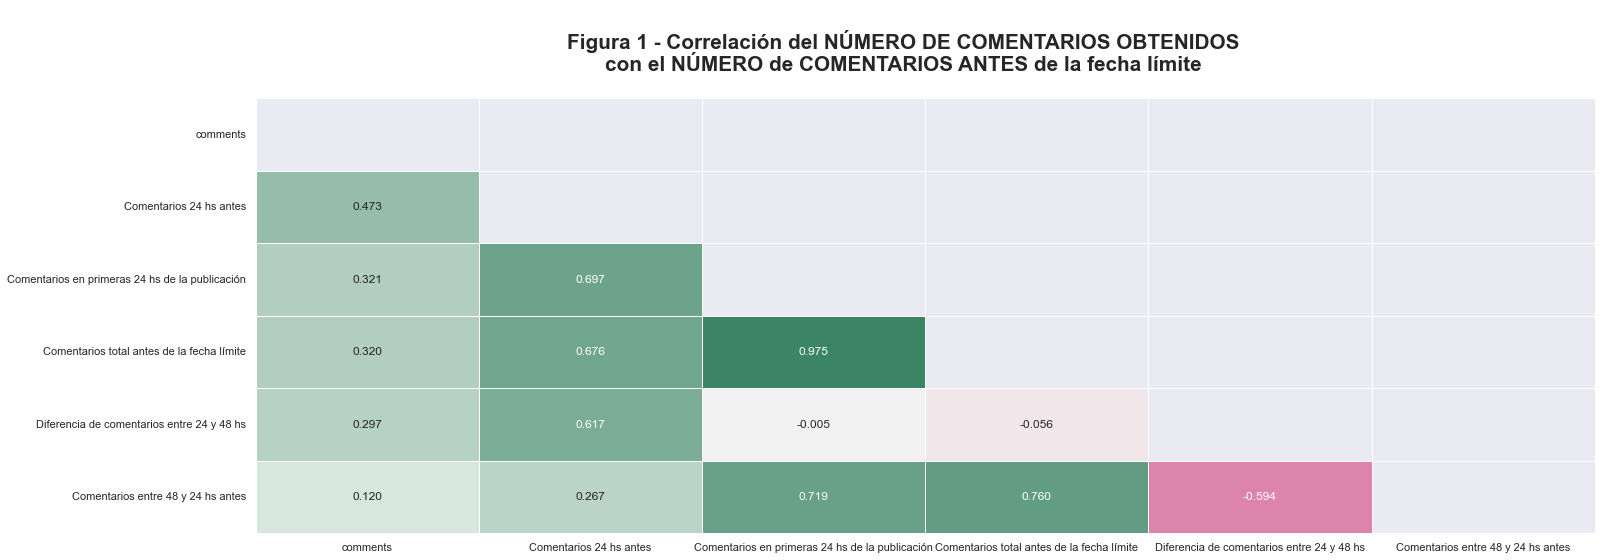

In [14]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 1' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTES de la fecha límite')
show_corr(data=data_train[features['nc'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 1.png', format='png')


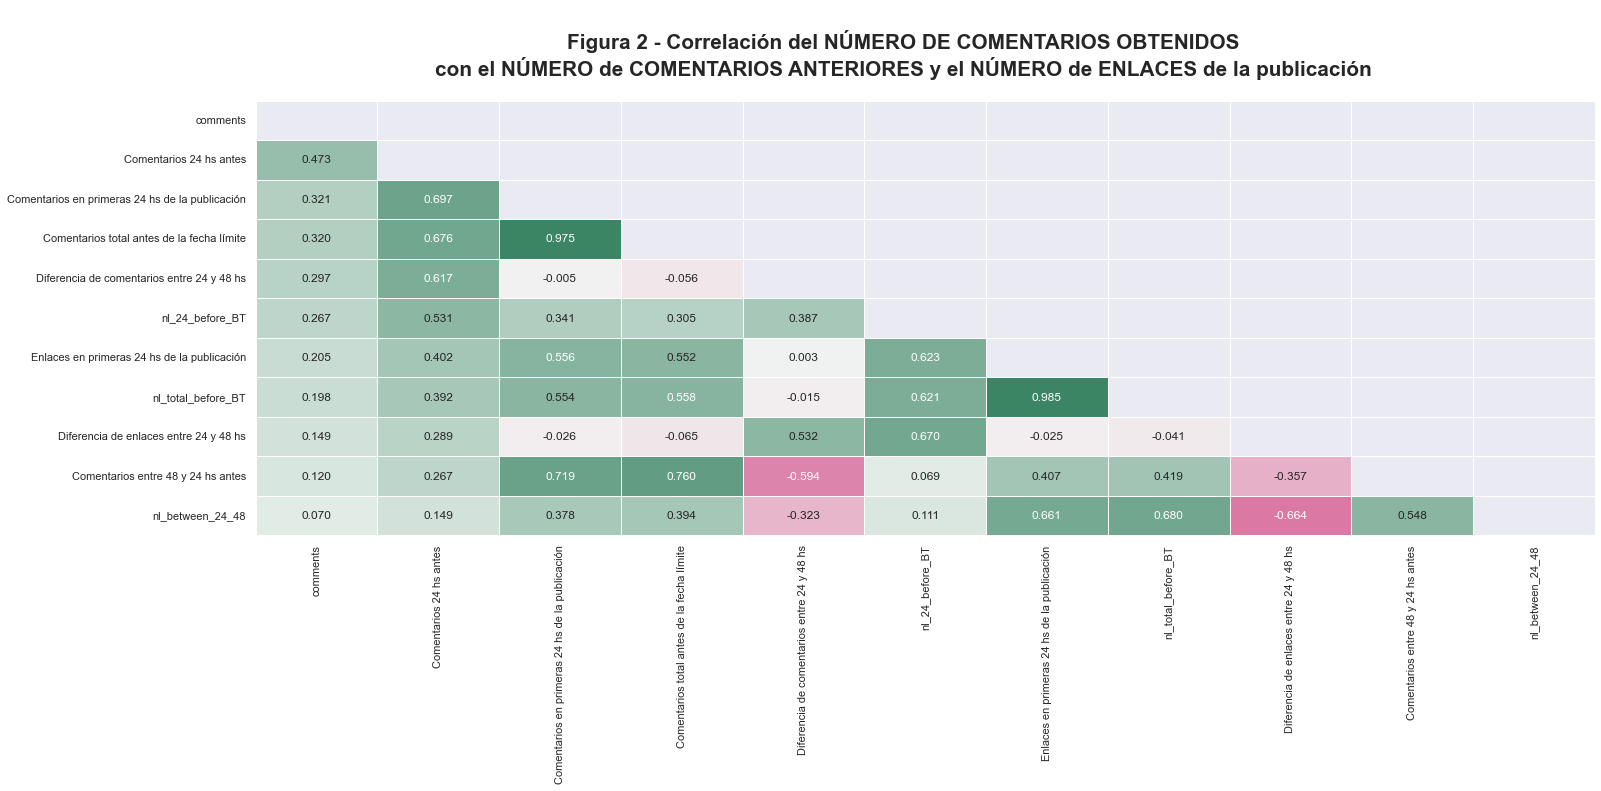

In [15]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 2' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTERIORES y el NÚMERO de ENLACES de la publicación')
show_corr(data=data_train[features['nc'] + features['nl'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 2.png', format='png')


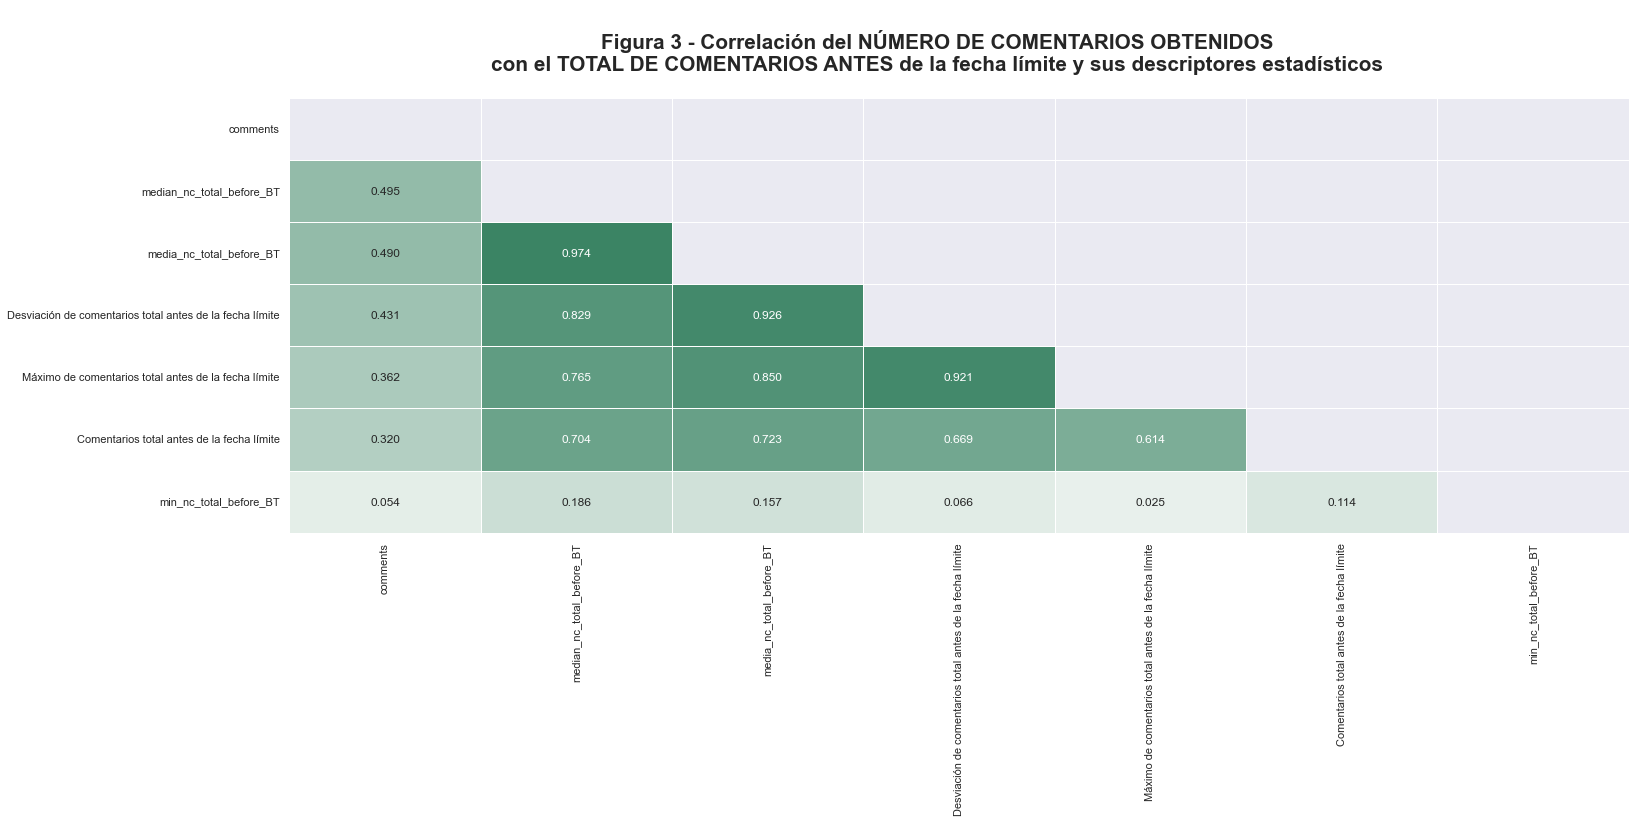

In [16]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 3' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el TOTAL DE COMENTARIOS ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_total_before_BT'] + features['sd_nc_total_before_BT'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 3.png', format='png')


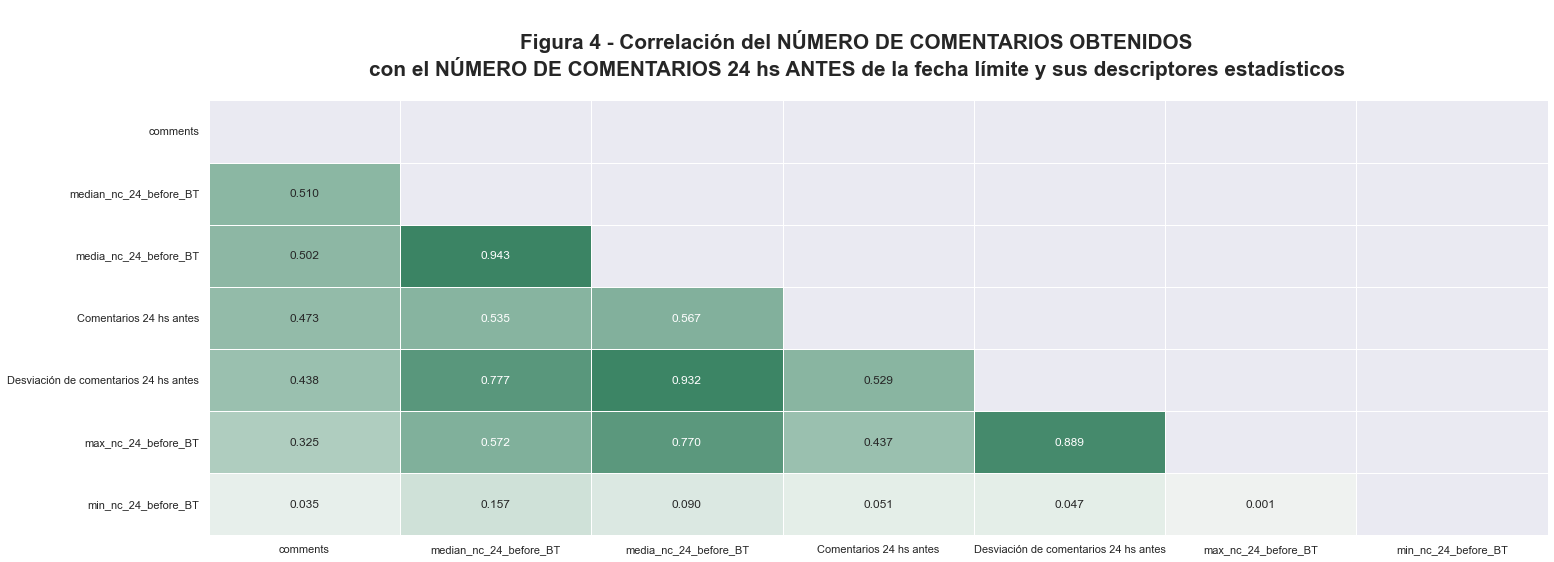

In [17]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 4' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS 24 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_24_before_BT'] + features['sd_nc_24_before_BT'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 4.png', format='png')


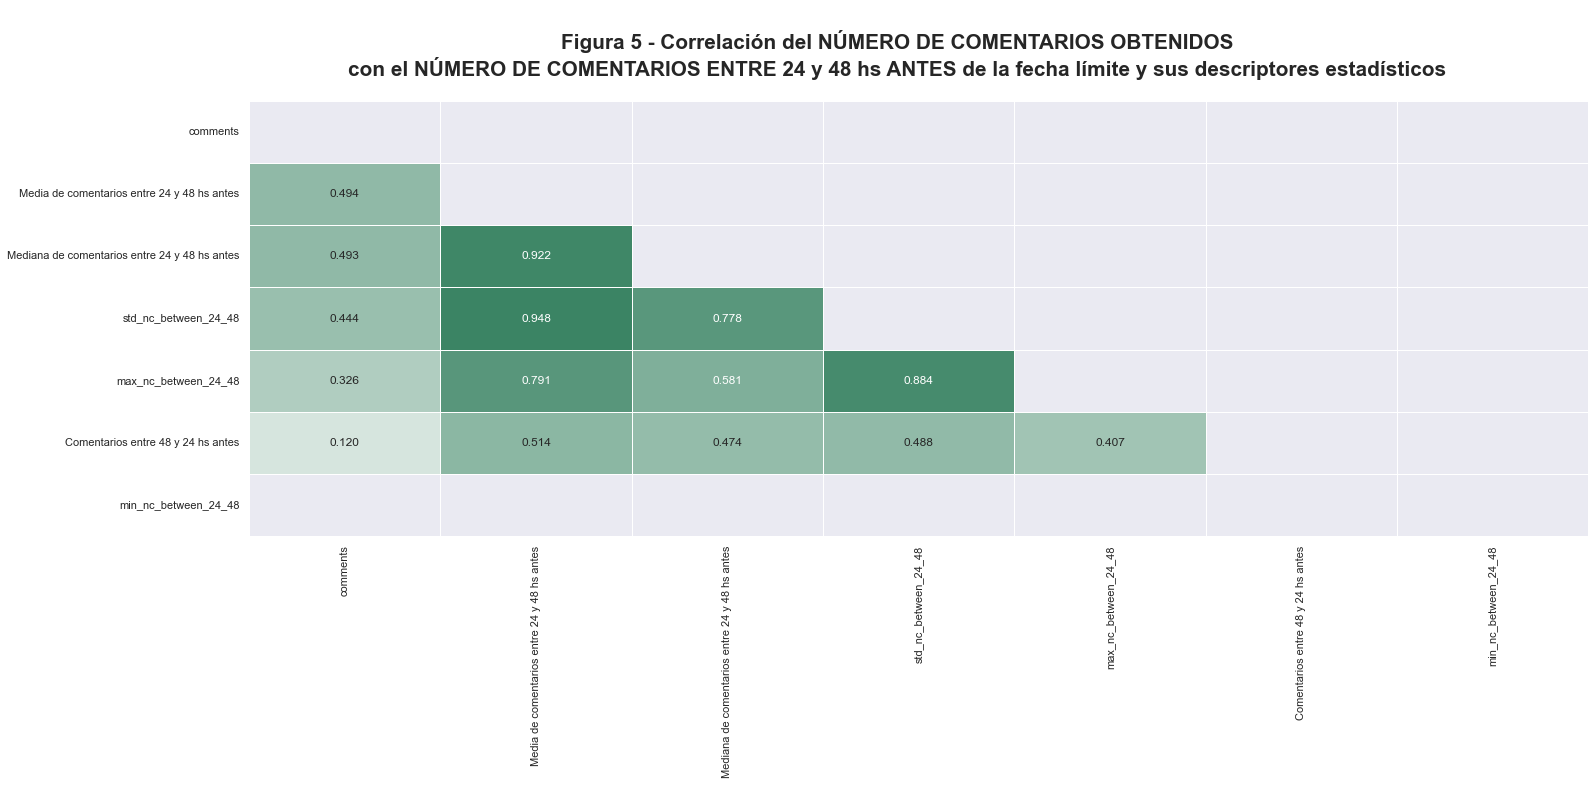

In [18]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 5' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS ENTRE 24 y 48 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_between_24_48'] + features['sd_nc_between_24_48'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 5.png', format='png')


---
<a id="ExploratoryDataAnalysis_3_2"></a>
#### 3.2. Correlaciones con palabras frecuentes y días de publicación

- En **Figura 6** se observa que la correlación del número de comentarios obtenidos después de la fecha límite es muy baja en relación a las palabras más utilizadas en el texto de la publicación

- En **Figura 7** se observa que la correlación del número de comentarios obtenidos después de la fecha límite también es muy baja en relación a los días de la semana en que se hizo la publicación así como la fecha límite misma


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

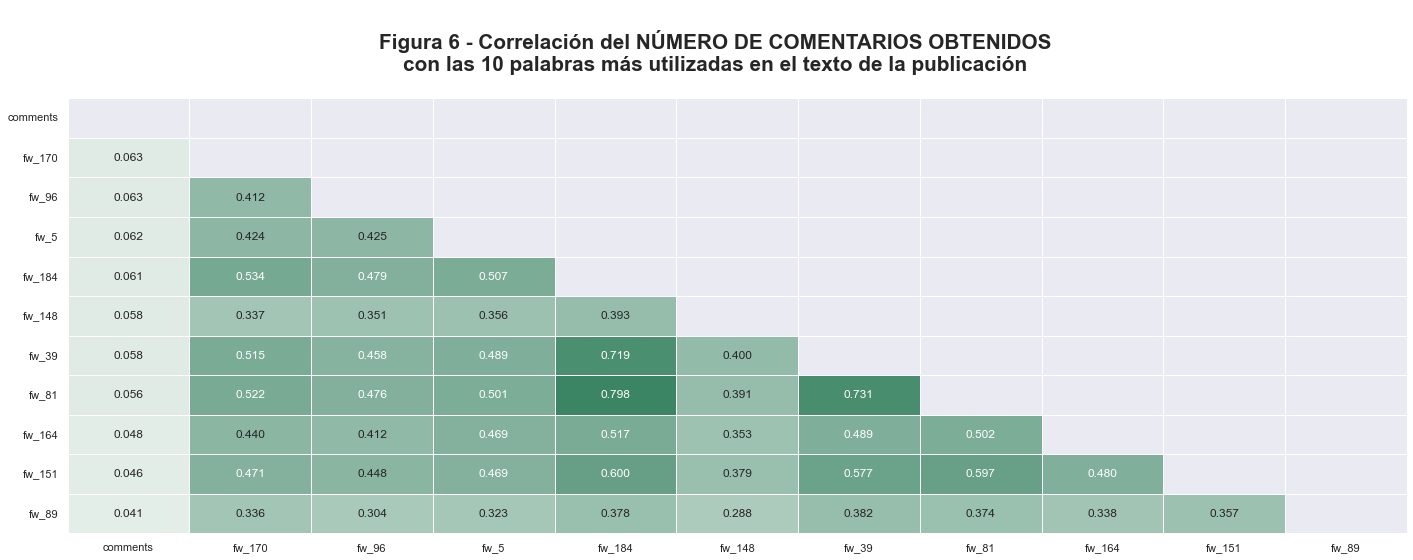

In [19]:

def get_frequent_word_counts_list(data) :
    u'''Custom function for plotting most used words
    '''

    result = pd.DataFrame(columns=['count'], data=data.sum() )
    result.reset_index(drop=False, inplace=True)
    result.rename(columns={'index' : 'word'}, inplace=True)
    result.sort_values(by='count', ascending=False, inplace=True)
    
    return list(result['word'])


first_10_words = get_frequent_word_counts_list(data_train[features['frequent_word']])[:10]

fig = set_figure(24, 8, 
                 suptitle='\nFigura 6' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con las 10 palabras más utilizadas en el texto de la publicación')
plt.xlabel('jaj')
show_corr(data=data_train[first_10_words + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 6.png', format='png')


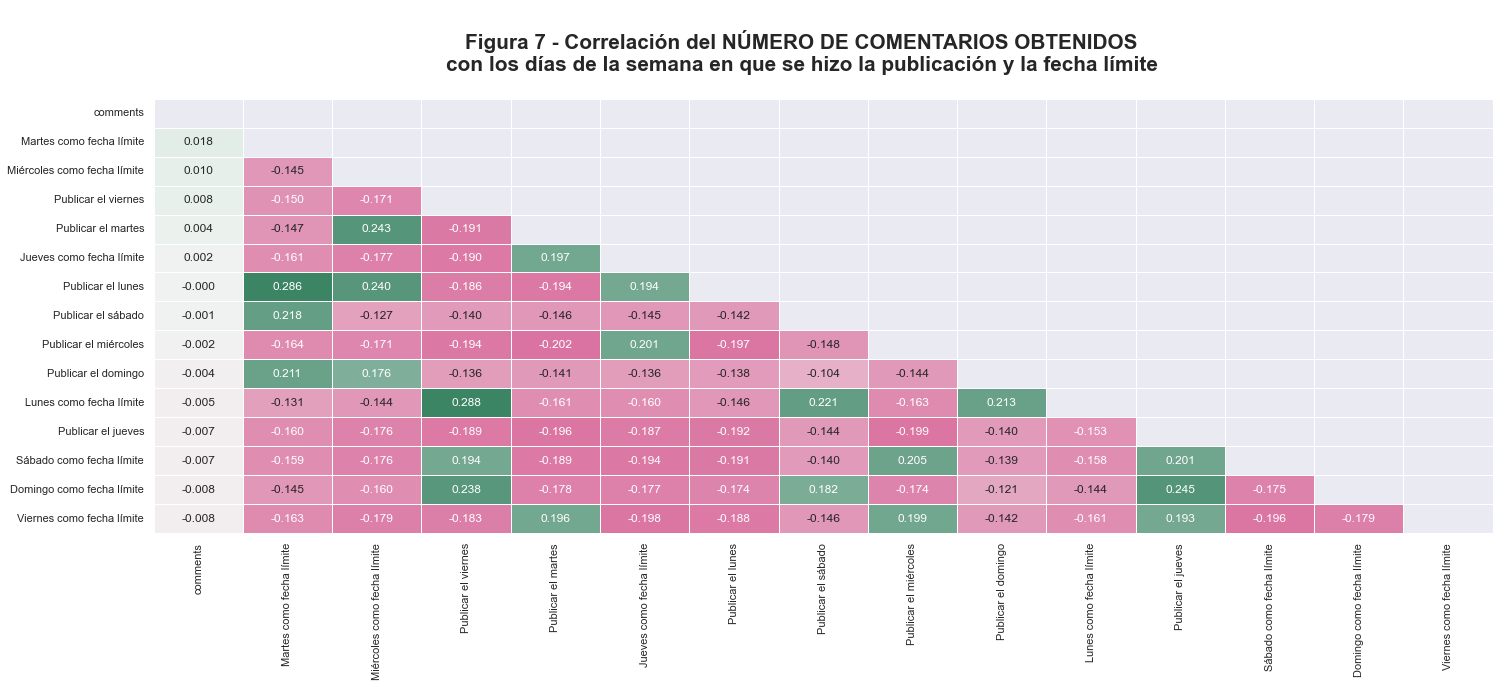

In [20]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 7' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con los días de la semana en que se hizo la publicación y la fecha límite')
show_corr(data=data_train[features['weekday_BT'] + features['weekday_post'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 7.png', format='png')


---
<a id="ExploratoryDataAnalysis_3_3"></a>
#### 3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones

- En **Figura 8** se aprecia que son pocas (menos del 4%) las publicaciones que obtienen un número de comentarios mayor o igual a 30

- En **Figura 9** se presenta la información sobre publicaciones que obtienen un número de comentarios menor a 30

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

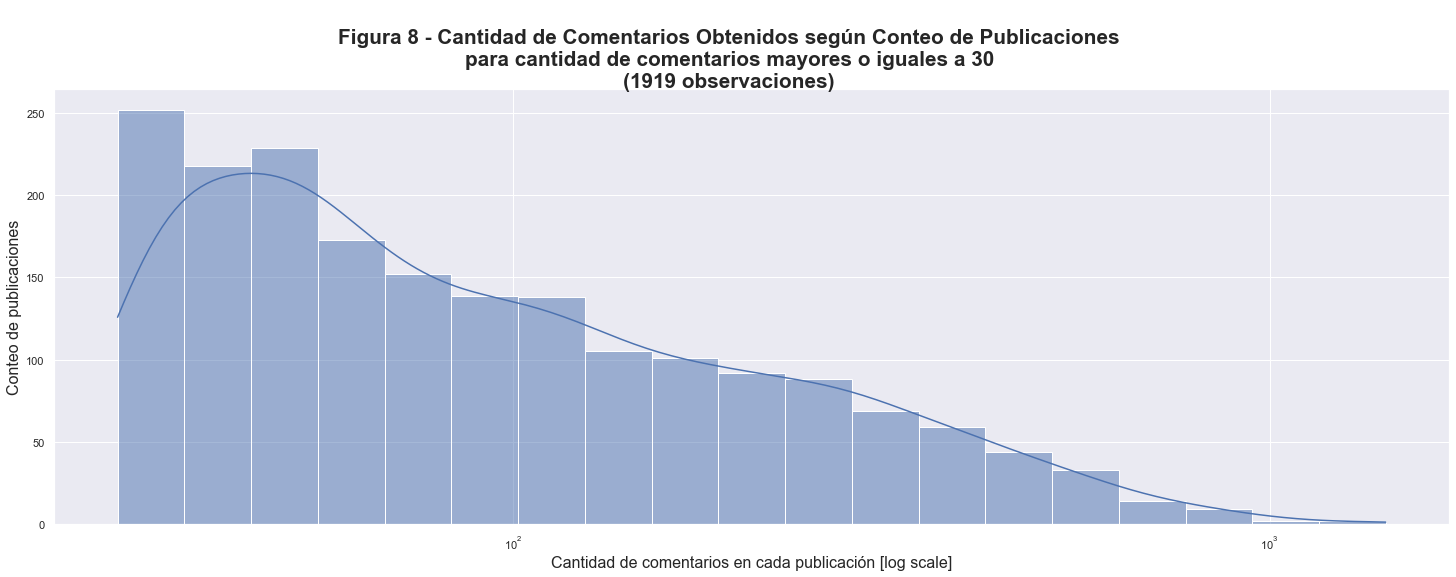

In [21]:
def get_obyc(data) :
    u'''Custom function for extracting comment count. Only purpose is a cleaner data plotting.
    '''
    temp1 = pd.DataFrame(data['comments'].value_counts())
    temp1.reset_index(inplace=True)
    temp1.columns = ['comments count', 'publications']
    temp1 = temp1.astype({'comments count':'int64'})
    return temp1

data_obyc = get_obyc(data_train)

set_figure(25, 8, 
           suptitle='\nFigura 8' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Conteo de Publicaciones' + '\n' + \
           'para cantidad de comentarios mayores o iguales a 30' + '\n' + \
           '(' + str(data_train[data_train['comments']>=30].shape[0]) + ' observaciones)', y=0.95,)
axs = sns.histplot(data=data_train[data_train['comments']>=30], x='comments', kde=True, log_scale=True);
axs.set_xlabel('Cantidad de comentarios en cada publicación [log scale]')
axs.set_ylabel('Conteo de publicaciones');

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 8.png', format='png')


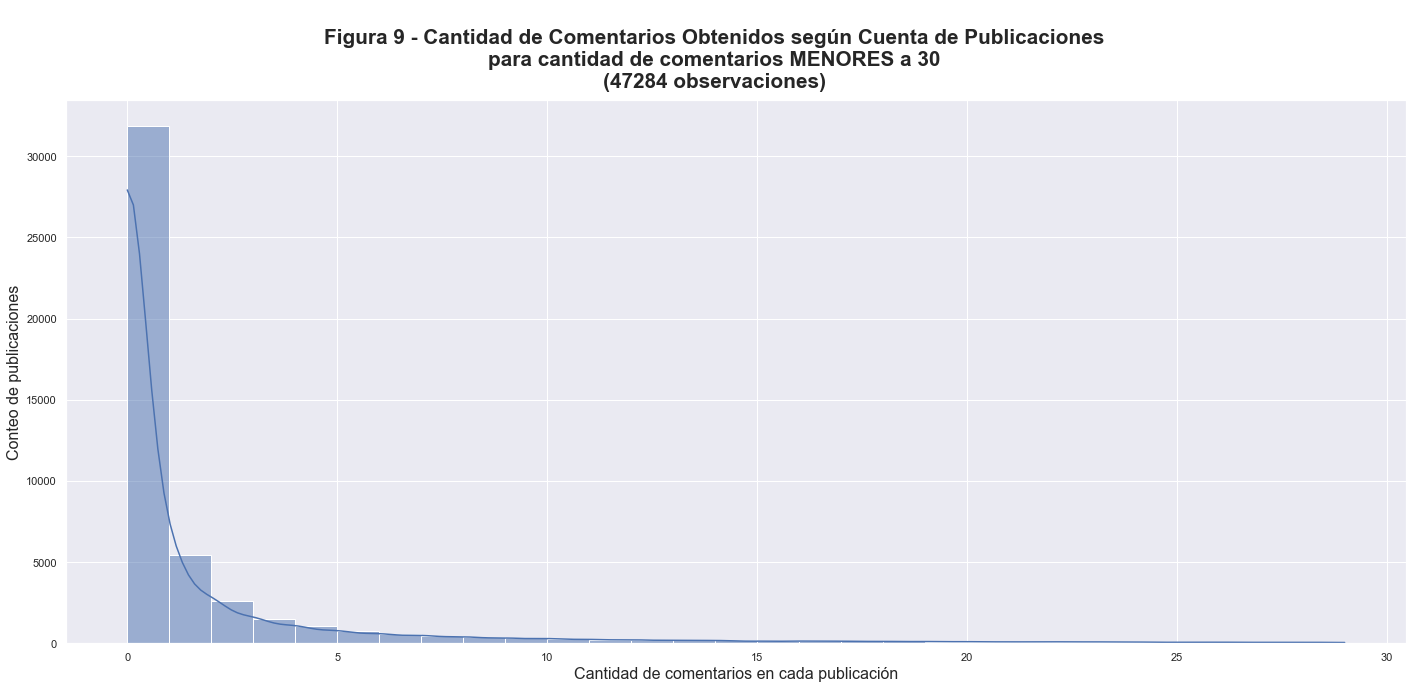

In [22]:
fig = set_figure(24, 10, 
           suptitle='\nFigura 9' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Cuenta de Publicaciones' + '\n' + \
           'para cantidad de comentarios MENORES a 30' + '\n' + \
           '(' + str(data_obyc[data_obyc['comments count']<30]['publications'].sum()) + ' observaciones)', y=0.95)
# sns.barplot(data=data_obyc[data_obyc['comments count']<30], y='comments count', x='publications', orient='v');
axs = sns.histplot(data=data_train[data_train['comments']<30], x='comments', binwidth=1,kde=True, kde_kws={});
axs.set_xlabel('Cantidad de comentarios en cada publicación');
axs.set_ylabel('Conteo de publicaciones');

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 9.png', format='png')


---

---
<a id="ProofOfConcept_3_4_1"></a>
### 3.4.1. Prueba de concepto para modelos de regresión

En la prueba de concepto para modelos de regresión con parámetros por defecto se observa que:

- Es posible predecir el número de comentarios a obtener en las próximas 24 horas con un **error de ± 25 comentarios**

- El *mejor tiempo* de entrenamiento es para el modelo XGBoost Regressor, sin embargo los parámetros por defecto presentan *un modelo sobreajustado*


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [23]:
data_train = read_blogData_train()
data_test = read_blogData_test()

X_train = data_train.iloc[:,0:280].copy()
y_train = data_train.iloc[:,-1].copy()

X_test = data_test.iloc[:,0:280].copy()
y_test = data_test.iloc[:,-1].copy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [24]:

def regression_proof_of_concept() :
    u'''Model listing. No need for hyperparametrization (yet) as this is only a POC. Intended for a quick baseline regression.
    '''

# ---
    data_train = read_blogData_train()
    data_test = read_blogData_test()

    X_train = data_train.iloc[:,0:280].copy()
    y_train = data_train.iloc[:,-1].copy()

    X_test = data_test.iloc[:,0:280].copy()
    y_test = data_test.iloc[:,-1].copy()

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
# ---
    models = []
    models.append( Eval_Estimator(
        name='Linear Regression', 
        estimator=LinearRegression(
            n_jobs=-1, # use all processors
        ), 
        pkl_file='./models/RM_POC_01.pkl' # file path and name to save serialized instance
    ) )

    models.append( Eval_Estimator(
        name='Random Forest Regressor', 
        estimator=RandomForestRegressor(
            n_jobs=-1, # use all processors
        ), 
        pkl_file='./models/RM_POC_02.pkl' # file path and name to save serialized instance
    ) )

    models.append( Eval_Estimator(
        name='Gradient Boosting Regressor', 
        estimator=GradientBoostingRegressor(), 
        pkl_file='./models/RM_POC_03.pkl' # file path and name to save serialized instance
        
    ) )

    models.append( Eval_Estimator(
        name='XGBoost Regressor', 
        estimator=xgb.XGBRegressor(
            n_jobs=-1, # use all processors
        ), 
        pkl_file='./models/RM_POC_04.pkl' # file path and name to save serialized instance
    ) )

# ---

    poc_results = pd.DataFrame(columns=['model', 'fit time', 'train RMSE', 'test RMSE'])

    for m in models :
        fit_time = np.NaN
        if m.pkl_file == None :
            print('Prueba de concepto para', m.name, '... ', end='')
            fit_time = time.time()
            m.estimator.fit(X_train, y_train)
            fit_time = ROUND(time.time() - fit_time)
            print(fit_time, 'segundos')
        else :
            try :
                with open(m.pkl_file, 'rb') as pkl_hand :
                    model = pickle.load(pkl_hand)
                    m.name = model.name
                    m.estimator = model.estimator
                    print('Se cargo el modelo', m.name, 'de', m.pkl_file, '...')
            except :
                print('Prueba de concepto para', m.name, '... ', end='')
                fit_time = time.time()
                m.estimator.fit(X_train, y_train)
                fit_time = ROUND(time.time() - fit_time)
                print(fit_time, 'segundos')
                save_model_as_pkl_file(m, m.pkl_file)

        y_train_pred = m.estimator.predict(X_train)
        train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        y_test_pred = m.estimator.predict(X_test)
        test_rmse = ROUND(np.sqrt(mean_squared_error(y_test, y_test_pred)))

        poc_results = poc_results.append(
            pd.Series(
                data=[m.name, 
                      fit_time, 
                      train_rmse, 
                      test_rmse
                     ], 
                index=poc_results.columns), 
            ignore_index=True
        )

    # pd.options.display.max_colwidth = 500 
    display(poc_results)
    return

# comment to hide proof of concept
regression_proof_of_concept()


Se cargo el modelo Linear Regression de ./models/RM_POC_01.pkl ...
Se cargo el modelo Random Forest Regressor de ./models/RM_POC_02.pkl ...
Se cargo el modelo Gradient Boosting Regressor de ./models/RM_POC_03.pkl ...
Se cargo el modelo XGBoost Regressor de ./models/RM_POC_04.pkl ...


,model,fit time,train RMSE,test RMSE
0,Linear Regression,NaN,45816.2993,44916.0892
1,Random Forest Regressor,NaN,39.0387,31.9354
2,Gradient Boosting Regressor,NaN,39.0428,31.9383
3,XGBoost Regressor,NaN,39.0159,31.9149


---
<a id="GridSearch_Evaluate_3_4_2"></a>
### 3.4.2. Evaluación de hiper parámetros para XGBRegressor

- Regularizar el modelo XGBoost es fundamental dado que los parámetros por defecto presentan sobreajuste (overfitting)

- En la documentación se encuentra que los parámetros: **reg_alpha**, **reg_lambda** y **subsample** permiten controlar el overfitting

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [25]:

def gridsearch_evaluate(X_train, y_train) :
    u'''Model listing. Every model should have a matching set of hyperparameters. 
    CAUTION !!! This script may take a long time to run.
    '''

# ---
    models = []

    models.append(
        Eval_Estimator(
            name='XGBoost Regressor L1 y L2',
            estimator=xgb.XGBRegressor(),
            gs_param_grid={
                'eval_metric' : ['rmse'], # root mean square error
                'gamma' : [1], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.2], # (eta) step size shrinkage
                'max_depth' : [8], # maximum depth of tree
                'n_estimators' : [1000], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['reg:squarederror'], # regression with squared loss
                'random_state' : [127], 
                'reg_alpha' : [1000], # L1 regularization
                'reg_lambda' : [1000], # L2 regularization
                'subsample' : [0.1], # prevents overfitting
            }
        )
    )
    
# ---

    gs_results = pd.DataFrame(columns=['model', 'best params', 'best score', 'train RMSE'])

    for m in models :
        scoring = 'neg_root_mean_squared_error'
        cv = StratifiedKFold(n_splits=2, random_state=11, shuffle=True)
        gs = GridSearchCV(
            estimator=m.estimator, # scikit-learn estimator interface
            param_grid=m.gs_param_grid, # dictionart key=parametrer, value=list of paraameter posible values
            scoring=scoring, # strategy to evaluate performance of cross-validated
            n_jobs=-2, # jobs in parallel -2 : all processors minus one
            refit=True, # refit estimator using best parameters
            cv=cv, # cross-validated splitting strategy
            return_train_score=False, # include training scores
            verbose=1 # display fold parameters, score, time, ...
        )
        
        print('Gridsearch para', m.name, '...')

        gs.fit(X_train, y_train)
        m.gs_estimator = gs.best_estimator_
        
        y_train_pred = gs.predict(X_train)
        gs_train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))

        gs_results = gs_results.append(
            pd.Series(
                data=[m.name, 
                      gs.best_params_, 
                      gs.best_score_, 
                      gs_train_rmse
                     ], 
                index=gs_results.columns
                ),
            ignore_index=True
        )

    pd.options.display.max_colwidth = 500 
    display(gs_results.sort_values(by=['train RMSE'], axis='index'))
    
    return

# CAUTION !!!, it takes a lot of time to run grid search
# comment next line to hide grid search evaluate
# gridsearch_evaluate(X_train, y_train)


---
<a id="Evaluate_Regression_Model_3_4_3"></a>
### 3.4.3. Evaluación del modelo de regresión

- La evaluación del modelo de regresión determinó que **la técnica de regresión no es adecuada en este momento**; los valores de RMSE calculados con los datos de evaluación no satisfacen las expectativas

- El valor de "30 comentarios obtendiso" es un punto de referencia y el modelo con los datos de evaluación presenta un mínimo de 5 comentarios y un máximo de 44 comentarios lo que es dificil de explicar


<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [26]:
def get_regression_model(pkl_file, X_train, y_train) :
    u''' This function searches the file directory and tries to open the already trained XGBoost Regressor
    If it does not exist, the model will be defined and fitted with the train data and saved as a pickle file
    '''
# ---
    try :
        with open(pkl_file, 'rb') as pkl_hand :
            model = pickle.load(pkl_hand)
        print('Se cargo el modelo', model.name, 'de', pkl_file, '...')
    except :
        model = Eval_Estimator(
            name='XGBRegressor L1 y L2', 
            estimator=Pipeline([
                ('scaler', SpecialScaler(StandardScaler())), 
                ('XGBoost', xgb.XGBRegressor(
                    eval_metric='rmse', # root mean square error
                    gamma=1, # (min_split_loss) minimum loss reduction
                    learning_rate=0.2, # (eta) step size shrinkage
                    max_depth=8, # maximum depth of tree
                    n_estimators=1000, 
                    n_jobs=-1, # use all processors
                    objective='reg:squarederror', # regression with squared loss
                    random_state=127, 
                    reg_alpha=1000, # (alpha) L1 regularization
                    reg_lambda=1000, # (lambda) L2 regularization
                    subsample=0.1, # prevents overfitting
                    verbosity = 0
                ))
            ]) 
        )
    # ---
        print('Entrenando modelo', model.name, '...')
        # print(model.estimator.get_params())
        model.estimator.fit(X_train, y_train)
        save_model_as_pkl_file(model, pkl_file)
    # ---
    return model
# ---


In [27]:
def evaluate_regression_model() :
    u''' This function focuses on the best regression model -->XGBRegressor<--
    When called, it will create a class instance with the best found hyperparameters and fit it with the train dataset
    Then it will extract the testing data from multiple files and create a single testing dataset
    Finally it will calculate RMSE
    '''

# ---
    data_raw = read_blogData_train()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()
# ---
    model = get_regression_model(FILE_XGBoost_Regressor_Final, X_train, y_train)
# ---
    
# ---
    class Eval_TestCase :
        u'''
        '''
        def __init__(self, case, data) :
            self.case = case
            self.data = data
            return    
# ---
    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    caselist = []
    for filename in filelist :
        temp_raw = pd.read_csv(filename, header=None)
        temp_raw.drop_duplicates(inplace=True)
        
        pos = filename.index('2012')
        caselist.append( Eval_TestCase(filename[pos: pos+10], temp_raw) )
# ---
    results = pd.DataFrame(columns=['case', 'count', 'y mean', 'y std', 'y min', 'y max', 'RMSE'])

    for e in caselist :
        X = e.data.iloc[:,0:280]
        y = e.data.iloc[:,-1]
        # X = scaler.transform(X)
        p = model.estimator.predict(X)
        rmse = ROUND(np.sqrt(mean_squared_error(y, p)))

        results = results.append(
            pd.Series(
                data=[e.case, 
                      y.shape[0], 
                      ROUND(y.mean()), 
                      ROUND(y.std()), 
                      ROUND(y.min()), 
                      ROUND(y.max()), 
                      rmse
                     ], 
                index=results.columns), 
            ignore_index=True
        )
        
    return results
# ---


In [28]:
# comment to hide evaluate of regression model
results = evaluate_regression_model()
display(results.sample(5))
display(results[['RMSE']].describe().transpose())

Se cargo el modelo XGBRegressor L1 y L2 de ./models/XGBoostRegressorFinal.pkl ...


,case,count,y mean,y std,y min,y max,RMSE
35,2012.03.07,102,5.2255,26.6030,0.0,195.0,20.5772
59,2012.03.31,209,7.1722,48.3878,0.0,632.0,26.8182
1,2012.02.02,130,6.0462,31.6323,0.0,325.0,18.6974
55,2012.03.27,108,7.7037,35.9889,0.0,332.0,16.2319
47,2012.03.19,98,4.2245,16.3578,0.0,124.0,15.9270


,count,mean,std,min,25%,50%,75%,max
RMSE,60.0,21.01826,9.549356,5.3397,13.5861,18.89485,26.362575,44.9422


---


---
<a id="ProofOfConcept_3_5_1"></a>
### 3.5.1. Prueba de concepto para modelos de clasificación

En la prueba de concepto para modelos de clasificación con parámetros por defecto se observa que:

- La mejor clasificación es la binaria, mediante la función to_classes se pudo evaluar alternativas que tal vez se vuelvan a considerar en otros modelos

- El *mejor tiempo* de entrenamiento es para el modelo Extreme Gradient Boosting (configurado como clasificador)


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [29]:

# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else (2 if v < 150 else (3 if v < 210 else 4)))
# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else 2)
to_classes = lambda v : 0 if v < 30 else 1


In [30]:

data_train = read_blogData_train()
data_test = read_blogData_test()

X_train = data_train.iloc[:,0:280].copy()
y_train = data_train.iloc[:,-1].copy()
y_train = y_train.apply(to_classes)

X_test = data_test.iloc[:,0:280].copy()
y_test = data_test.iloc[:,-1].copy()
y_test = y_test.apply(to_classes)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Se cargo el modelo Naive Bayes Gaussian de ./models/CM_POC_01.pkl ...


              precision    recall  f1-score   support

           0   0.995575  0.009517  0.018854     47284
           1   0.039322  0.998958  0.075666      1919

    accuracy                       0.048107     49203
   macro avg   0.517449  0.504237  0.047260     49203
weighted avg   0.958280  0.048107  0.021069     49203



              precision    recall  f1-score   support

           0   0.951613  0.008684  0.017211      6794
           1   0.034270  0.987603  0.066242       242

    accuracy                       0.042354      7036
   macro avg   0.492942  0.498144  0.041726      7036
weighted avg   0.920061  0.042354  0.018898      7036

Se cargo el modelo Random Forest Classifier de ./models/CM_POC_02.pkl ...


              precision    recall  f1-score   support

           0   0.969132  0.997970  0.983339     47284
           1   0.812500  0.216780  0.342246      1919

    accuracy                       0.967502     49203
   macro avg   0.890816  0.607375  0.662793     49203
weighted avg   0.963023  0.967502  0.958336     49203



              precision    recall  f1-score   support

           0   0.968607  0.999117  0.983626      6794
           1   0.785714  0.090909  0.162963       242

    accuracy                       0.967879      7036
   macro avg   0.877161  0.545013  0.573294      7036
weighted avg   0.962317  0.967879  0.955399      7036

Se cargo el modelo Gradient Boosting Classifier de ./models/CM_POC_03.pkl ...


              precision    recall  f1-score   support

           0   0.981930  0.994078  0.987967     47284
           1   0.790105  0.549244  0.648017      1919

    accuracy                       0.976729     49203
   macro avg   0.886017  0.771661  0.817992     49203
weighted avg   0.974448  0.976729  0.974708     49203



              precision    recall  f1-score   support

           0   0.979396  0.993524  0.986409      6794
           1   0.694444  0.413223  0.518135       242

    accuracy                       0.973565      7036
   macro avg   0.836920  0.703373  0.752272      7036
weighted avg   0.969596  0.973565  0.970303      7036

Se cargo el modelo XGB Classifier default de ./models/CM_POC_04.pkl ...


              precision    recall  f1-score   support

           0   0.991539  0.998858  0.995185     47284
           1   0.965605  0.789995  0.869017      1919

    accuracy                       0.990712     49203
   macro avg   0.978572  0.894426  0.932101     49203
weighted avg   0.990528  0.990712  0.990264     49203



              precision    recall  f1-score   support

           0   0.979858  0.995290  0.987514      6794
           1   0.762963  0.425620  0.546419       242

    accuracy                       0.975696      7036
   macro avg   0.871410  0.710455  0.766966      7036
weighted avg   0.972398  0.975696  0.972342      7036



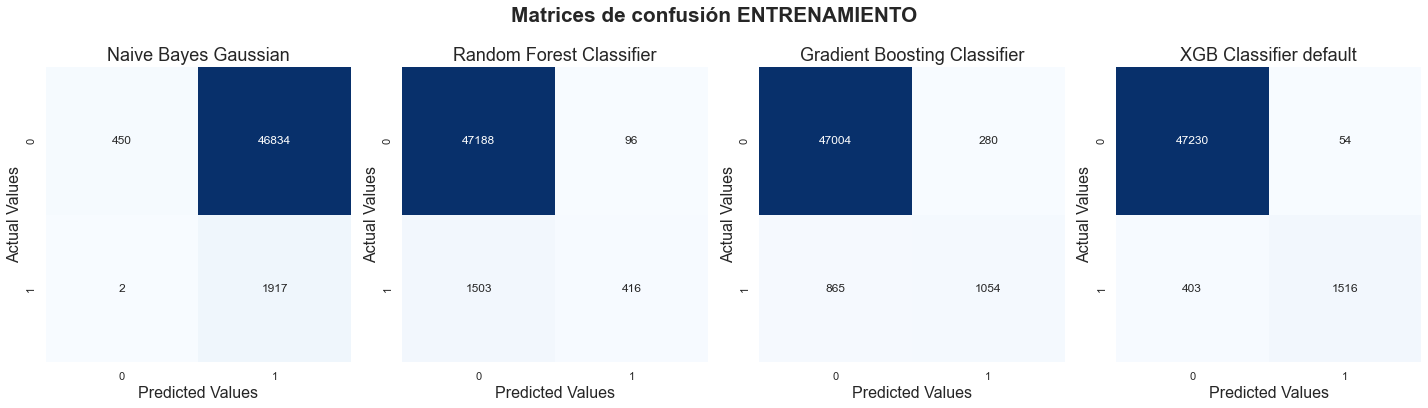

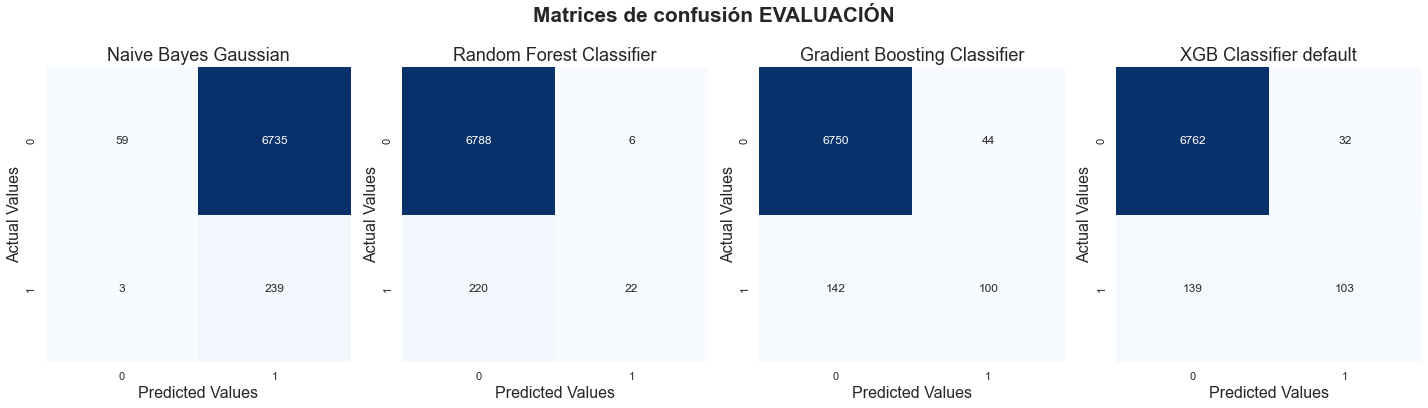

In [31]:

def classification_proof_of_concept() :
    u''' Model listing. No need for hyperparametrization (yet) as this is only a POC. Intended for a quick baseline clasification.
    '''

    data_train = read_blogData_train()
    data_test = read_blogData_test()

    X_train = data_train.iloc[:,0:280].copy()
    y_train = data_train.iloc[:,-1].copy()
    y_train = y_train.apply(to_classes)

    X_test = data_test.iloc[:,0:280].copy()
    y_test = data_test.iloc[:,-1].copy()
    y_test = y_test.apply(to_classes)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
# ---
    models = []
    models.append( Eval_Estimator(
        name='Naive Bayes Gaussian', 
        estimator=GaussianNB(),  
        pkl_file='./models/CM_POC_01.pkl' # file path and name to save serialized instance
    ) )

    models.append( Eval_Estimator(
        name='Random Forest Classifier', 
        estimator=RandomForestClassifier(
            n_estimators=100, 
            criterion='gini', 
            max_depth=3, 
            bootstrap=True, 
            n_jobs=-1, 
            max_samples=0.3, 
            random_state=127
        ), 
        pkl_file='./models/CM_POC_02.pkl' # file path and name to save serialized instance
    ) )

    models.append( Eval_Estimator(
        name='Gradient Boosting Classifier', 
        estimator=GradientBoostingClassifier(
            # loss='log_loss', # loss function to optimize ???
            learning_rate=0.1, # contribution of each tree
            n_estimators=100, # large values -> better performance
            subsample=1, #  values < 1.0 -> low variance and high bias
            criterion='friedman_mse', # measure the quality of a split
            max_depth=3, # tree depth limits the number of nodes
            random_state=127
        ), 
        pkl_file='./models/CM_POC_03.pkl' # file path and name to save serialized instance
    ) )

    models.append( Eval_Estimator(
        name='XGB Classifier default', 
        estimator=xgb.XGBClassifier(
            eval_metric='auc', # 
            n_jobs=-1, # use all processors
            objective='binary:logistic', # for binary classification 
            # objective='multi:softprob', # for multi-class classification
            random_state=127, 
        ), 
        pkl_file='./models/CM_POC_04.pkl' # file path and name to save serialized instance
    ) )
    
# ---
    for m in models :
        fit_time = np.NaN
        if m.pkl_file == None :
            print('Prueba de concepto para', m.name, '... ', end='')
            fit_time = time.time()
            m.estimator.fit(X_train, y_train)
            fit_time = ROUND(time.time() - fit_time)
            print(fit_time, 'segundos')
        else :
            try :
                with open(m.pkl_file, 'rb') as pkl_hand :
                    model = pickle.load(pkl_hand)
                    m.name = model.name
                    m.estimator = model.estimator
                    print('Se cargo el modelo', m.name, 'de', m.pkl_file, '...')
            except :
                print('Prueba de concepto para', m.name, '... ', end='')
                fit_time = time.time()
                m.estimator.fit(X_train, y_train)
                fit_time = ROUND(time.time() - fit_time)
                print(fit_time, 'segundos')
                save_model_as_pkl_file(m, m.pkl_file)
# ---
        y_pred = m.estimator.predict(X_train)
        display(HTML('<b>' + m.name + ' ENTRENAMIENTO</b>'))
        print(classification_report(y_train, y_pred, digits=6, target_names=None, output_dict=False))

        y_pred = m.estimator.predict(X_test)
        display(HTML('<b>' + m.name + ' TESTEO</b>'))
        print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))
# ---
        
    fig = set_figure(20, 10, 'Matrices de confusión ENTRENAMIENTO')
    cols = 4
    rows = (len(models) // cols) + 1

    for i, m in enumerate(models) :
        y_pred = m.estimator.predict(X_train)

        plt.subplot(rows, cols, i+1)
        ax=sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        
    fig = set_figure(20, 10, 'Matrices de confusión EVALUACIÓN')
    cols = 4
    rows = (len(models) // cols) + 1
    
    for i, m in enumerate(models) :
        y_pred = m.estimator.predict(X_test)

        plt.subplot(rows, cols, i+1)
        ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')

    return

# comment to hide proof of concept
classification_proof_of_concept()


---
<a id="GridSearch_Evaluate_3_5_2"></a>
### 3.5.2. Evaluación de hiper parámetros para XGBClassifier

- En este modelo el desbalance de clases impactó fuertemente hasta hallar valores de un par de hiperparámetros, learning_rate y max_delta_step que estabilizaron el incremento de la métrica seleccionada


<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [32]:

def classification_gridsearch_evaluate(X_train, y_train) :
    u'''Model listing. Every model should have a matching set of hyperparameters. 
    CAUTION !!! This script may take a long time to run.
    '''
# ---
    data_train = read_blogData_train()
    data_test = read_blogData_test()

    X_train = data_train.iloc[:,0:280].copy()
    y_train = data_train.iloc[:,-1].copy()
    y_train = y_train.apply(to_classes)

    X_test = data_test.iloc[:,0:280].copy()
    y_test = data_test.iloc[:,-1].copy()
    y_test = y_test.apply(to_classes)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
# ---
    models = []

    models.append(
        Eval_Estimator(
            name='XGBoost Classifier 1',
            estimator=xgb.XGBClassifier(),
            gs_param_grid={
                'eval_metric' : ['auc'], # 
                'gamma' : [0, 1], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.01], # (eta) step size shrinkage
                'max_delta_step' : [1e2], # extremely imbalanced
                'max_depth' : [6], # maximum depth of tree
                'n_estimators' : [100], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['binary:logistic'], # for binary classification 
                'random_state' : [127], 
                # 'subsample' : [0.1, 0.5, 1], # prevents overfitting
            }
        )
    )
    models.append(
        Eval_Estimator(
            name='XGBoost Classifier 2',
            estimator=xgb.XGBClassifier(),
            gs_param_grid={
                'eval_metric' : ['auc'], # 
                'gamma' : [0], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.0001], # (eta) step size shrinkage
                'max_delta_step' : [1e6], # extremely imbalanced
                'max_depth' : [8, 10], # maximum depth of tree
                'n_estimators' : [500], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['binary:logistic'], # for binary classification 
                'random_state' : [127], 
                # 'subsample' : [0.1, 0.5, 1], # prevents overfitting
            }
        )
    )
    
# ---

    gs_results = pd.DataFrame(columns=['model', 'best params', 'best score', 'train ROC AUC'])

    for m in models :
        scoring = 'roc_auc'
        cv = StratifiedKFold(n_splits=2, random_state=11, shuffle=True)
        gs = GridSearchCV(
            estimator=m.estimator, # scikit-learn estimator interface
            param_grid=m.gs_param_grid, # dictionart key=parametrer, value=list of paraameter posible values
            scoring=scoring, # strategy to evaluate performance of cross-validated
            n_jobs=-2, # jobs in parallel -2 : all processors minus one
            refit=True, # refit estimator using best parameters
            cv=cv, # cross-validated splitting strategy
            return_train_score=False, # include training scores
            verbose=3 # display fold parameters, score, time, ...
        )
        
        print('Gridsearch para', m.name, '...')

        gs.fit(X_train, y_train)
        m.gs_estimator = gs.best_estimator_
        
        y_train_pred = gs.predict(X_train)
        gs_train_roc_auc = ROUND(roc_auc_score(y_train, y_train_pred))

        gs_results = gs_results.append(
            pd.Series(
                data=[m.name, 
                      gs.best_params_, 
                      gs.best_score_, 
                      gs_train_roc_auc
                     ], 
                index=gs_results.columns
                ),
            ignore_index=True
        )

    pd.options.display.max_colwidth = 500 
    display(gs_results.sort_values(by=['train ROC AUC'], axis='index'))
    
    # return

# CAUTION !!!, it take a lot of time to run grid search
# comment to hide grid search evaluate
# classification_gridsearch_evaluate(X_train, y_train)


---
<a id="Evaluate_Clasification_Model_3_5_3"></a>
### 3.5.3. Evaluación del modelo de clasificación

- Calcular las metricas establecidas para este modelo en los datos proveistos para la evaluación arrojó valores de AU ROC y f1-score que son aceptables incluso más que aceptables

- Fijado el contexto de aplicación del modelo permite determinar si tales valores son excelentes

- **No hay duda que el modelo permite seleccionar un conjunto de publicaciones que tendrán muchos comentarios !!!**


<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [33]:
def get_classification_model(pkl_file, X_train, y_train) :
    u''' This function searches the file directory and tries to open the already trained XGBoost Classifier
    If it does not exist, the model will be defined and fitted with the train data and saved as a pickle file
    '''
    # ---
    try :
        with open(pkl_file, 'rb') as pkl_hand :
            model = pickle.load(pkl_hand)
        print('Se cargo el modelo', model.name, 'de', pkl_file, '...')
    except :
        model = Eval_Estimator(
            name='XGBoost Classifier (pipe)', 
            estimator=Pipeline([
                ('scaler', SpecialScaler(StandardScaler())), 
                ('XGBoost', xgb.XGBClassifier(
                    eval_metric = 'auc', # 
                    gamma = 0, # (min_split_loss) minimum loss reduction
                    learning_rate = 0.0001, # (eta) step size shrinkage
                    max_delta_step = 1e6, # extremely imbalanced
                    max_depth = 20, # maximum depth of tree
                    n_estimators = 500, 
                    n_jobs = -1, # use all processors
                    objective = 'binary:logistic', # for binary classification 
                    random_state = 127, 
                    verbosity = 0
                ))
            ]) 
        )
    # ---
        print('Entrenando modelo', model.name, '...')
        # print(model.estimator.get_params())
        model.estimator.fit(X_train, y_train)
    # ---
        save_model_as_pkl_file(model, pkl_file)
    # ---
    return model
# ---


In [34]:

def evaluate_classification_model() :
    u''' This function focuses on the best classification model -->XGBClassifier<--
    When called, it will create a class instance with the best found hyperparameters and fit it with the train dataset
    Then it will extract the testing data from multiple files and create a single testing dataset
    Finally it will calculate f1-score and AUC-ROC
    '''
# ---
    data_raw = read_blogData_train()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()
    y_train = y_train.apply(to_classes)

# ---
    model = get_classification_model(FILE_XGBoost_Classifier_Final, X_train, y_train)
# ---
    class Eval_TestCase :
        u'''
        '''
        def __init__(self, case, data) :
            self.case = case
            self.data = data
            self.y_test = None
            self.y_pred = None
            return    
# ---
    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    caselist = []
    for filename in filelist :
        temp_raw = pd.read_csv(filename, header=None)
        temp_raw.drop_duplicates(inplace=True)
        
        pos = filename.index('2012')
        caselist.append( Eval_TestCase(filename[pos: pos+10], temp_raw) )
# ---
    results = pd.DataFrame(columns=['case', 'count', 'ROC AUC', 'y_test', 'y_pred', 'y_pred_proba','f1-score'])

    for e in caselist :
        X = e.data.iloc[:,0:280]
        y = e.data.iloc[:,-1]
        y = y.apply(to_classes)

        p = model.estimator.predict(X)
        pp = model.estimator.predict_proba(X)
        
        e.y_test = y
        e.y_pred = p
        
        d = classification_report(y_true=y, y_pred=p, output_dict=True)
        
        try :
            roc_auc = ROUND(roc_auc_score(y, p))
            f1 = ROUND(d['1']['f1-score'])
        except :
            rec_auc = -1
            f1 = np.NaN

        results = results.append(
            pd.Series(
                data=[e.case, 
                      y.shape[0], 
                      roc_auc, 
                      y, p, pp, 
                      f1 
                     ], 
                index=results.columns), 
            ignore_index=True
        )
        
    return results
# ---    


# # comment to hide evaluate of regression model
results = evaluate_classification_model()
display(results[['case', 'count', 'ROC AUC', 'f1-score']].sample(5))
display(results[['ROC AUC']].describe().transpose())
display(results[['f1-score']].describe().transpose())

Se cargo el modelo XGBoost Classifier (pipe) de ./models/XGBoostClassifierFinal.pkl ...


,case,count,ROC AUC,f1-score
49,2012.03.21,126,0.5792,0.2500
30,2012.03.02,137,0.7462,0.5714
28,2012.02.29,108,0.8702,0.7500
48,2012.03.20,109,0.8333,0.8000
20,2012.02.21,88,0.8275,0.6667


,count,mean,std,min,25%,50%,75%,max
ROC AUC,60.0,0.755022,0.152464,0.488,0.6647,0.7462,0.842525,1.0


,count,mean,std,min,25%,50%,75%,max
f1-score,59.0,0.55789,0.283095,0.0,0.4143,0.5714,0.73865,1.0


In [35]:
def show_roc_curves(results) :
    u'''Build a text report showing the main classification metrics.
    '''
    
    fig = set_figure(row=24, col=40, suptitle='Areas bajo la curva', y=0.99, fontsize='x-large')
    cols = 6
    rows = (results.shape[0] // cols) + 1

    for i in range(results.shape[0]) :
        ax = plt.subplot(rows, cols, i+1)
        y = results.iloc[i]['y_test']
        p = results.iloc[i]['y_pred']
        pp = results.iloc[i]['y_pred_proba']

        d = classification_report(y_true=y, y_pred=p, output_dict=True)

        # RocCurveDisplay.from_predictions(y_true=y, y_pred=p, name='', ax=ax)
        fpr, tpr, _ = roc_curve(y, pp[:, 1])
        plt.plot(fpr, tpr)
        
        plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01), linestyle='-.' )
        try :
            plt.xlabel('precision: {:2.2f} recall: {:2.2f}\n       f1-score: {:2.2f}'.format( d['1']['precision'], d['1']['recall'], d['1']['f1-score'] ))
        except :
            plt.xlabel('')
        plt.ylabel('')
        plt.tight_layout(pad=1.10)
    plt.show()
    return

# show_roc_curves(results)

Hay 53 de 60 Casos con ROC AUC mayor a 0.5


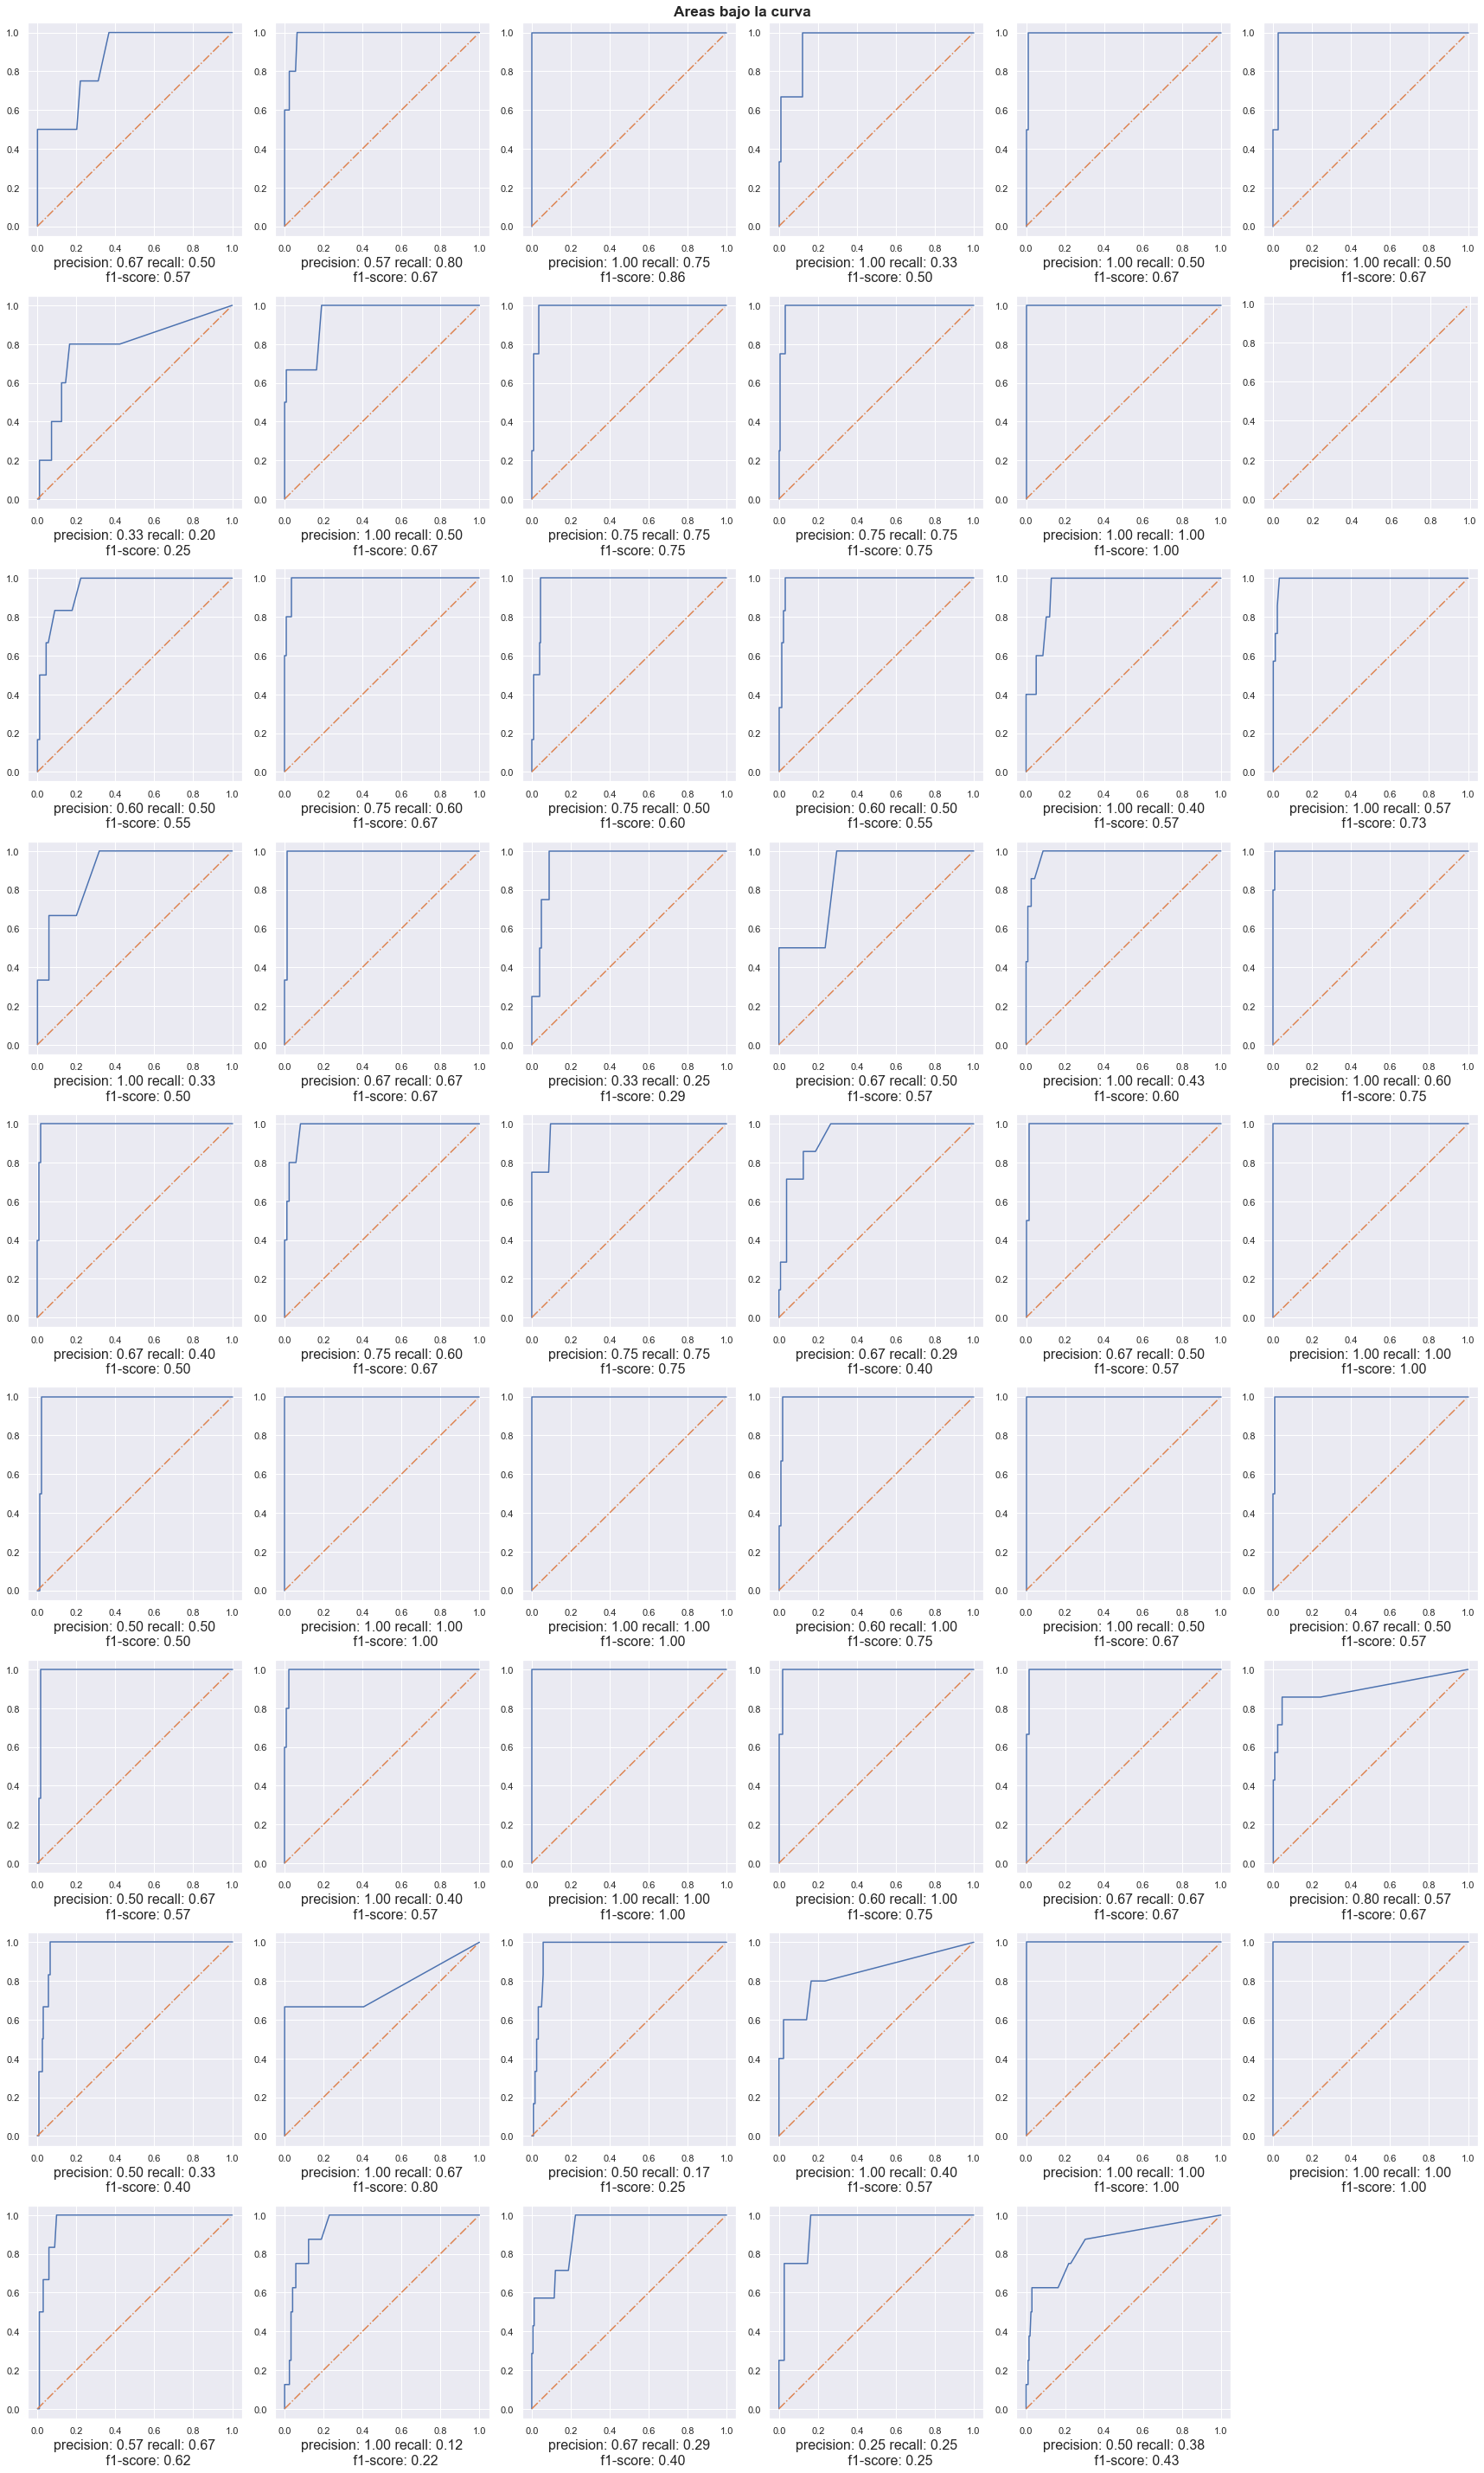

In [36]:
roc_auc_limit = 0.5
mask = results['ROC AUC'] > roc_auc_limit
print('Hay', results[mask].shape[0], 'de', results.shape[0], 'Casos con ROC AUC mayor a', roc_auc_limit)
# descomentar para ver las ROC de los casos de test.
show_roc_curves(results[mask]) 


In [37]:
# f1_score_limit = 0.60
# mask = results['f1-score'] > f1_score_limit
# print('Hay', results[mask].shape[0], 'de', results.shape[0], 'Casos con f1-score mayor a', f1_score_limit)
# show_roc_curves(results[mask])

---
<a id="FeatureImportance_3_6"></a>
### 3.6. Importancia de features

- El análisis de importancia de features nos permite brindar una mejor perspectiva de cuales son las variables que tienen alto impacto en los resultados obtenidos


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [38]:
data_raw = read_blogData_train()
# test_raw = blogData_test_read()

X_train = data_raw.iloc[:,0:280]
y_train = data_raw.iloc[:,-1].copy()
y_train = y_train.apply(to_classes)

# ---

model = get_classification_model(FILE_XGBoost_Classifier_Final, X_train, y_train)


Se cargo el modelo XGBoost Classifier (pipe) de ./models/XGBoostClassifierFinal.pkl ...


In [39]:

def get_feature_importance(models, data_columns) :
    u'''
    
    '''
    
    result = pd.DataFrame(columns=['model'] + list(data_columns))
    
    for m in models :
        c = m.estimator
        if isinstance(c, Pipeline) :
            c = c.steps[-1][1]

        result = result.append(
            pd.Series(
                data=[m.name] + list(c.feature_importances_), 
                index=result.columns
            ), 
            ignore_index=True 
        )

    result = pd.DataFrame(result.mean(), columns=['rate'])
    result.reset_index(drop=False, inplace=True)
    result.rename(columns={'index' : 'feature'}, inplace=True)
    result.sort_values(by='rate', ascending=False, inplace=True)
    
    result.reset_index(drop=True, inplace=True)
    result['rank'] = result.index
    
    return result


In [40]:
def show_feature_importance(models, data_columns) :

    result = get_feature_importance(models, data_columns)
    result.rename(columns={'rate' : 'rate global', 'rank' : 'rank global'}, inplace=True)

    if len(models) > 1 :
        for m in models :
            temp = get_feature_importance([m], data_columns)
            result = result.merge(right=temp[['feature', 'rate', 'rank']], on='feature', how='inner', suffixes=(None, ' ' + m.name) )
    
    return result

pd.options.display.max_colwidth = 200 
show_feature_importance(models=[model], data_columns=X_train.columns)[:16]


,feature,rate global,rank global
0,Comentarios 24 hs antes,0.122732,0
1,median_nc_total_before_BT,0.073042,1
2,Media de la diferencia de comentarios entre 48 y 24 hs,0.066276,2
3,Diferencia de comentarios entre 24 y 48 hs,0.045481,3
4,media_nl_first_24_BT,0.040660,4
5,Tiempo entre publicación y fecha límite,0.035805,5
6,Mediana de comentarios primeras 24 hs de la publicación,0.034947,6
7,media_nl_between_24_48,0.032491,7
8,Desviación de comentarios total antes de la fecha límite,0.025741,8
9,Máximo de comentarios total antes de la fecha límite,0.025512,9


In [41]:
FILE_shap_values_Classifier_Final = './models/shapvaluesClassifierFinal.pkl'

In [42]:

class Shap_Serialized :
    u''' Plain class for shap instances
    '''

    def __init__(self, name, X_train, explainer, shap_values) :
        self.name = name
        self.X_train = X_train
        self.explainer = explainer
        self.shap_values = shap_values

        return        
# ---


In [43]:
# load JS visualization code to notebook
shap.initjs()

mybooster = model.estimator.named_steps['XGBoost'].get_booster()

In [44]:
model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

In [45]:
#this will take time. You can downsize the sample to speed things up (500 is a good starting point)

try :
    with open(FILE_shap_values_Classifier_Final, 'rb') as pkl_hand :
        myshap = pickle.load(pkl_hand)
    print('Se cargo el modelo', myshap.name, 'de', FILE_shap_values_Classifier_Final, '...')
except :
    X_train_sampled=X_train.sample(2000)
    explainer = shap.TreeExplainer(mybooster)
    shap_values = explainer.shap_values(X_train_sampled)

    myshap = Shap_Serialized(
        name='Shap for 2000 samples', 
        X_train=X_train_sampled, 
        explainer=explainer, 
        shap_values=shap_values
    )
    save_model_as_pkl_file(myshap, FILE_shap_values_Classifier_Final)

# ---

X_train_sampled = myshap.X_train
explainer = myshap.explainer
shap_values = myshap.shap_values
    

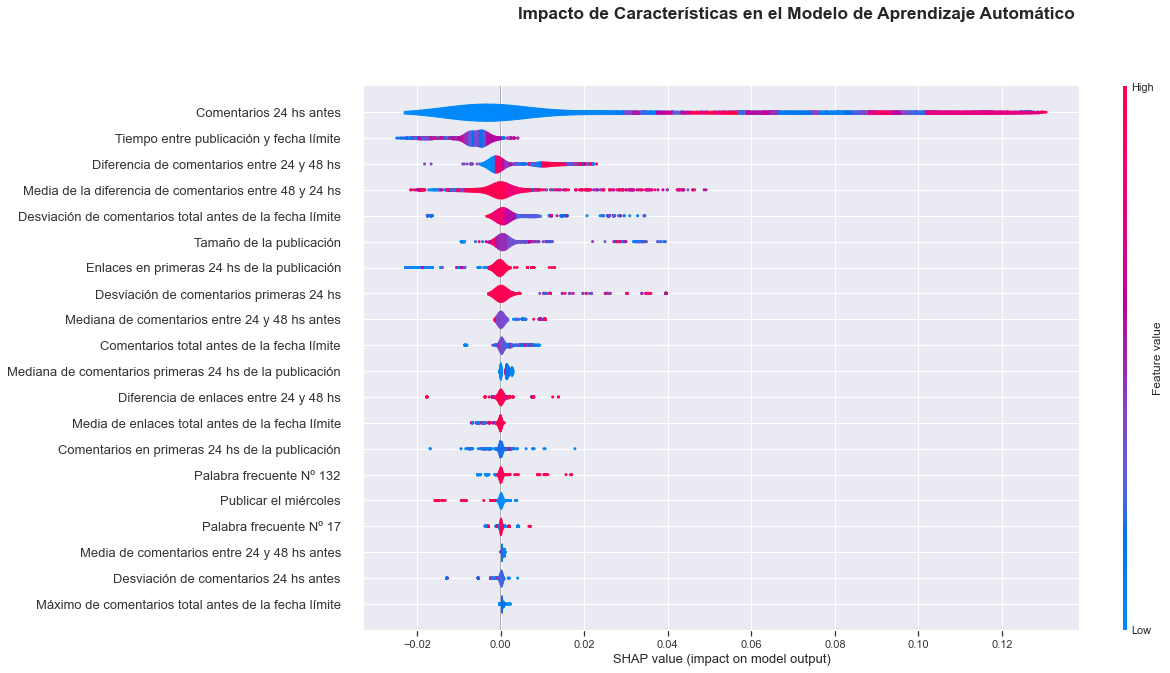

In [46]:
fig = set_figure(row=40, col=40, suptitle='Impacto de Características en el Modelo de Aprendizaje Automático', fontsize='x-large')

shap.summary_plot(shap_values=shap_values, 
                  features=X_train_sampled, 
                  max_display=20, 
                  plot_type='violin', 
                  plot_size=(16, 10)
                 )

---
<a id="Findings_4_1"></a>
### 4.1. Hallazagos

- Los estadísticos del sitio, media, mediana, ... del espacio virtual en el que se realizan las publicaciones tienen un altísimo impacto en la cantidd de comentarios de una publicación

- En este modelo, para esta etapa de la predicción, los valores de la bolsa de palabras no cambian el resultado de la predicción


<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

---
<a id="Conclusions_4_2"></a>
### 4.2. Conclusiones

- La tarea de **recolección sistemático de datos** es fundamental para este modelo, en este proyecto no se realizó ninguna tarea relacionada la preparación de los datos

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

---
<a id="Recommendations_4_3"></a>
### 4.3. Recomendaciones

- Segmentar la información de acuerdo a otros parámetros, por ejemplo la región tanto del sitio donde se publica como del origen de los comentarios (requiere recolectar el IP de quienes realizan comentarios y utilizar un mecanismo de geolocalización de tales IPs que sea confiable) puede mejora la utilidad de los resultado obtenidos

- Vincular a "*quién comenta*" con un conjunto de intereses mediante una o más redes sociales puede aportar mejor información que la bolsa de palabras

- Desarrollar otros modelos dependientes del contexto particular es imprescindible para mejorar las métricas

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---